In [1]:
from pymodulon.io import *
from pymodulon.plotting import *
from os import path

In [2]:
data_dir = path.join('..','data','5g_processed_data')
interim_dir = path.join('..','data','5g_interim')

In [3]:
ica_data = load_json_model(path.join(data_dir,'5g_raw.json.gz'))

In [4]:
DF_enrichments = pd.read_csv(path.join(data_dir,'5G_functional_enrichments.csv'),index_col=0)

# Add iModulon category

In [5]:
for i,row in ica_data.imodulon_table.iterrows():
    # if pd.notnull(row.regulator):
    #     ica_data.imodulon_table.loc[i, 'category'] = 'regulatory'
    if pd.notnull(row.single_gene):
        ica_data.imodulon_table.loc[i, 'category'] = 'single_gene'
    else:
        ica_data.imodulon_table.loc[i, 'category'] = 'uncharacterized'

In [6]:
ica_data.imodulon_table.head(15)

,single_gene,imodulon_size,explained_variance,category
0,NaN,111,0.010961,uncharacterized
1,NaN,23,0.006986,uncharacterized
2,NaN,44,0.020010,uncharacterized
SG_1,True,1,0.003638,single_gene
4,NaN,3,0.004384,uncharacterized
5,NaN,62,0.040222,uncharacterized
6,NaN,20,0.011649,uncharacterized
7,NaN,5,0.004450,uncharacterized
8,NaN,6,0.021518,uncharacterized
9,NaN,16,0.009330,uncharacterized


# Inspect all iModulons without an automated annotation

In [7]:
unchar_imods = ica_data.imodulon_table[ica_data.imodulon_table.category == 'uncharacterized']

In [8]:
unchar_imods

,single_gene,imodulon_size,explained_variance,category
0,NaN,111,0.010961,uncharacterized
1,NaN,23,0.006986,uncharacterized
2,NaN,44,0.020010,uncharacterized
4,NaN,3,0.004384,uncharacterized
5,NaN,62,0.040222,uncharacterized
6,NaN,20,0.011649,uncharacterized
7,NaN,5,0.004450,uncharacterized
8,NaN,6,0.021518,uncharacterized
9,NaN,16,0.009330,uncharacterized
10,NaN,85,0.028817,uncharacterized


### iModulon 0: Unknown

In [9]:
ica_data.view_imodulon(0)

,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS00110,0.039180,NaN,25137,25554,1,OsmC family protein,O,"Post-translational modification, protein turno...",A0A4V1IJB6,2817,speD // EQU24_RS00110,WP_017841455.1,||None,NaN,[]
EQU24_RS00165,0.053646,NaN,36832,37129,-1,hypothetical protein,X,No COG annotation,A0A4V1IJB7,2810,EQU24_RS00165,WP_017841444.1,||None,NaN,[]
EQU24_RS00390,0.047510,NaN,82907,83930,1,glycosyltransferase family 4 protein,M,Cell wall/membrane/envelope biogenesis,UPI000344E98D,2777,EQU24_RS00390,WP_017841409.1,||None,phospho-N-acetylmuramoyl-pentapeptide-transfer...,['phospho-N-acetylmuramoyl-pentapeptide-transf...
EQU24_RS00450,0.040135,NaN,95639,95957,1,phosphoribosyl-ATP diphosphatase,E,Amino acid transport and metabolism,A0A4P9UN41,2770,EQU24_RS00450 // hisI // hisF // hisA // hisH ...,WP_017841397.1,||None,phosphoribosyl-ATP diphosphatase activity\ncar...,['phosphoribosyl-ATP diphosphatase activity'\n...
EQU24_RS00455,0.041064,tatA,96158,96371,1,twin-arginine translocase TatA/TatE family sub...,U,"Intracellular trafficking, secretion, and vesi...",A0A4P9UIV2,2769,tatC // tatB // tatA,WP_017841396.1,tatA||tatA,amide transport\npeptide transport\npeptide se...,['amide transport' 'peptide transport' 'peptid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS20900,0.120391,NaN,4708570,4708813,-1,hypothetical protein,X,No COG annotation,A0A4P9USB7,167,EQU24_RS20900 // EQU24_RS20895,WP_017841694.1,||None,NaN,[]
EQU24_RS21260,-0.039489,NaN,4791094,4791280,1,hypothetical protein,X,No COG annotation,NaN,120,EQU24_RS21260,NaN,||,NaN,[]
EQU24_RS21815,0.054058,NaN,4920552,4921551,1,hypothetical protein,X,No COG annotation,A0A4P9USR1,43,EQU24_RS21830 // EQU24_RS21825 // EQU24_RS2182...,WP_017841539.1,||None,NaN,[]
EQU24_RS22125,0.071297,NaN,4994218,4994407,-1,DUF4102 domain-containing protein,L,"Replication, recombination and repair",A0A4P9UVG7,3,EQU24_RS22125,WP_017841476.1,||None,DNA integration\nDNA recombination\nDNA bindin...,['DNA integration' 'DNA recombination' 'DNA bi...


<AxesSubplot:ylabel='0 iModulon\nActivity'>

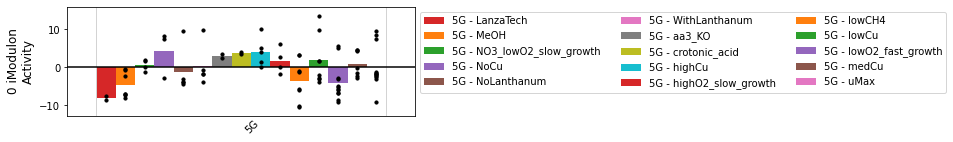

In [10]:
plot_activities(ica_data,0,highlight=['5G'])

# Erin's replotting attempt

In [11]:
def plot_activities_erin(
    ica_data, imodulon, assigned_colors=None, ax=None, legend_kwargs=None
):
    """
    Creates a barplot showing an iModulon's activity across the compendium
    Parameters
    ----------
    ica_data: ~pymodulon.core.IcaData
        :class:`~pymodulon.core.IcaData` object
    imodulon: int or str
        `iModulon` name
    projects: list or str, optional
        Name(s) of `projects` to show (default: show all)
    highlight: str or list, optional
        Name(s) of projects to `highlight` (default: None)
    ax: ~matplotlib.axes.Axes, optional
        Axes object to plot on, otherwise use current Axes
    legend_kwargs: dict, optional
        Additional keyword arguments passed to :func:`matplotlib.pyplot.legend`
    Returns
    -------
    ax: ~matplotlib.axes.Axes
        :class:`~matplotlib.axes.Axes` containing the barplot
    """

    # Check that iModulon exists
    if imodulon in ica_data.A.index:
        values = ica_data.A.loc[imodulon]
    else:
        raise ValueError(f"iModulon does not exist: {imodulon}")

    label = "{} iModulon\nActivity".format(imodulon)

    return barplot_erin(
        values=values,
        sample_table=ica_data.sample_table,
        ylabel=label,
        # projects=projects,
        # highlight=highlight,
        assigned_colors=assigned_colors,
        ax=ax,
        legend_kwargs=legend_kwargs,
    )


In [12]:
def barplot_erin(
    values,
    sample_table,
    ylabel="",
    #projects=None,
    #highlight=None,
    assigned_colors=None,
    ax=None,
    legend_kwargs=None,
):
    """
    Creates an overlaid scatter and barplot for a set of values (either gene
    expression levels or iModulon activities)
    Parameters
    ----------
    values: ~pandas.Series
        List of `values` to plot
    sample_table: ~pandas.DataFrame
        Sample table from :class:`~pymodulon.core.IcaData` object
    ylabel: str, optional
        Y-axis label
    projects: list or str, optional
        Name(s) of `projects` to show (default: show all)
    highlight: list or str, optional
        Project(s) to `highlight` (default: None)
    ax: ~matplotlib.axes.Axes, optional
        Axes object to plot on, otherwise use current Axes
    legend_kwargs: dict, optional
        Additional keyword arguments passed to :func:`matplotlib.pyplot.legend`
    Returns
    -------
    ax: ~matplotlib.axes.Axes
        :class:`~matplotlib.axes.Axes` containing the barplot
    """

    # # Remove extra projects
    # if isinstance(projects, str):
    #     projects = [projects]

    # if projects is not None and len(projects) == 1:
    #     highlight = projects

    # if projects is not None and "project" in sample_table:
    #     sample_table = sample_table[sample_table.project.isin(projects)]
    #     values = values[sample_table.index]

    if ax is None:
        figsize = (len(values) / 15 + 0.5, 2)
        fig, ax = plt.subplots(figsize=figsize)

    # Get ymin and max
    ymin = values.min()
    ymax = values.max()
    yrange = ymax - ymin
    ymax = max(1, max(ymax * 1.1, ymax + yrange * 0.1))
    ymin = min(-1, min(ymin * 1.1, ymin - yrange * 0.1))
    yrange = ymax - ymin

    # Add project-specific information
    if "project" in sample_table.columns and "condition" in sample_table.columns:

        # Sort data by project/condition to ensure replicates are together
        metadata = sample_table.loc[:, ["project", "condition"]]
        metadata = metadata.sort_values(["project", "condition"])
        #metadata["name"] = metadata.project + " - " + metadata.condition.astype(str)
        metadata["name"] = metadata.condition.astype(str)

        # set xaxis order
        xorder = ['uMax','MeOH','NoCu','lowCu','medCu','highCu','lowCH4','WithLanthanum','NoLanthanum','highO2_slow_growth','NO3_lowO2_slow_growth','lowO2_fast_growth',]
        metadata['xorder'] = pd.Categorical(metadata['condition'],categories=xorder)
        metadata = metadata.sort_values('xorder')

        # Coerce highlight to iterable
        # if highlight is None:
        #     highlight = []
        # elif isinstance(highlight, str):
        #     highlight = [highlight]

        # Get X and Y values for scatter points
        metadata["y"] = values
        metadata["x"] = np.cumsum(~metadata[["name"]].duplicated())
        # ^^ looks for name duplications, increments when finds non-duplicated name

        # Get heights for barplot
        bar_vals = metadata.groupby("x").mean()

        # Add colors and names
        bar_vals["name"] = metadata.drop_duplicates("name").name.values
        bar_vals["project"] = metadata.drop_duplicates("name").project.values
        #bar_vals['xorder'] = pd.Categorical(bar_vals['name'],categories=xorder)
        #bar_vals = bar_vals.sort_values('xorder').reset_index()
        #return bar_vals


        # Plot bars for highlighted samples
        #color_vals = bar_vals[bar_vals.project.isin(highlight)]
        color_cycle = [
            "tab:red",
            "tab:orange",
            "tab:green",
            "tab:purple",
            "tab:brown",
            "tab:pink",
            "tab:gray",
            "tab:olive",
            "tab:cyan",
        ]


        i = 0
        #for name, group in bar_vals.groupby("name"):
        for j,row in bar_vals.iterrows():
            cond = row['name']
            if cond in assigned_colors:
                c = assigned_colors[cond]
            else:
                c = color_cycle[i]
                i = (i + 1) % len(color_cycle)
            ax.bar(
                #row.index,
                j,
                row.y,
                color=c,
                width=1,
                linewidth=0,
                align="edge",
                zorder=1,
                label=cond,
            )
            

        # # Plot bars for non-highlighted samples
        # other_vals = bar_vals[~bar_vals.project.isin(highlight)]
        # ax.bar(
        #     other_vals.index,
        #     other_vals.y,
        #     color="tab:blue",
        #     width=1,
        #     linewidth=0,
        #     align="edge",
        #     zorder=1,
        #     label=None,
        # )
        ax.scatter(metadata.x + 0.5, metadata.y, color="k", zorder=2, s=10)

        # Get project names and sizes
        projects = metadata.project.drop_duplicates()
        md_cond = metadata.drop_duplicates(["name"])
        project_sizes = [len(md_cond[md_cond.project == proj]) for proj in projects]
        nbars = len(md_cond)

        # Draw lines to discriminate between projects
        proj_lines = np.cumsum([1] + project_sizes)
        ax.vlines(proj_lines, ymin, ymax, colors="lightgray", linewidth=1)

        # # Add project names
        # texts = []
        # start = 2
        # for proj, size in zip(projects, project_sizes):
        #     x = start + size / 2
        #     texts.append(
        #         ax.text(
        #             x, ymin - yrange * 0.02, proj, ha="right", va="top", rotation=45
        #         )
        #     )
        #     start += size

        # Add cond names
        texts = []
        start = 1
        size=1
        for pos,cond in enumerate(bar_vals['name'].values):
            x = start + size / 2
            #x=x+2
            texts.append(
                ax.text(
                    x, ymin - yrange * 0.02, cond, ha="center", va="top", rotation=90
                )
            )
            start += size

        # Add legend
        #if not color_vals.empty:
        if not bar_vals.empty:
            kwargs = {
                "bbox_to_anchor": (1, 1),
                "ncol": len(bar_vals.name.unique()) // 8+1#6 + 1,
            }

            if legend_kwargs is not None:
                kwargs.update(legend_kwargs)

            ax.legend(**kwargs)

    else:
        logging.warning("Missing `project` and `condition` columns in `sample_table.`")
        ax.bar(range(len(values)), values, width=1, align="edge")
        nbars = len(values)

    # Set axis limits
    xmin = -0.5
    xmax = nbars + 2.5
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    # Axis labels
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xticks([])

    # X-axis
    ax.hlines(0, xmin, xmax, color="k")

    return ax

In [13]:
# specific colors to use for plots
color_spec = {
    'uMax':'#d9d9d9', # gray
    'NoCu':'#bdd7e7', # blues
    'lowCu':'#6baed6', # blues
    'medCu':'#3182bd', # blues
    'highCu':'#08519c', # blues
    'lowCH4':'#b3de69', # green
    'WithLanthanum':'#e6550d', #orange
    'NoLanthanum':'#fdbe85', #orange
    'MeOH':'#fb8072', #red
    'highO2_slow_growth':'#6a3d9a',
    'NO3_lowO2_slow_growth':'#bc80bd', # purple
    'lowO2_fast_growth':'#fccde5', # pink
    'LanzaTech':'#33a02c', #green
    'aa3_KO':'#e6f598', # light green
    'crotonic_acid':'#fee08b', #yellow
}

In [14]:
def imod_scatter(ica_data, mod_id):
    mod_row = ica_data.imodulon_table[ica_data.imodulon_table.index==mod_id]
    size = mod_row['imodulon_size'].values[0]
    fig = plt.figure(figsize=(3,3))
    sns.scatterplot(data=ica_data.imodulon_table, x='imodulon_size',y='explained_variance')
    sns.scatterplot(data=mod_row, x='imodulon_size',y='explained_variance',color='r',s=200)
    plt.title(f'iModulon {mod_id} ({size} genes)')
    plt.show()

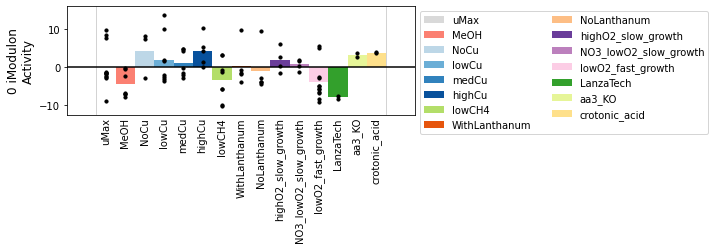

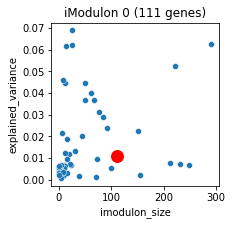

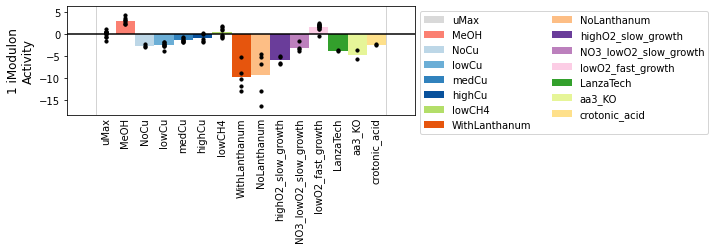

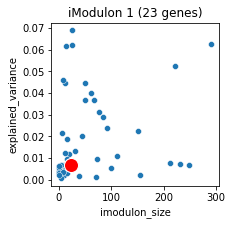

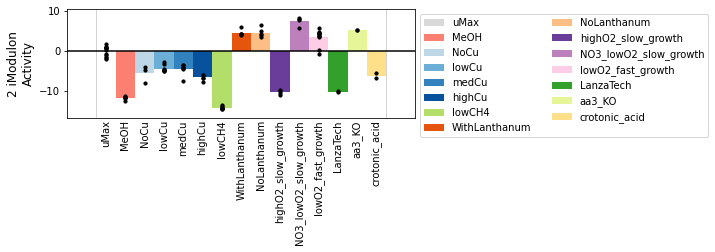

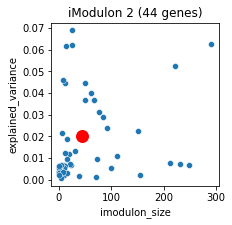

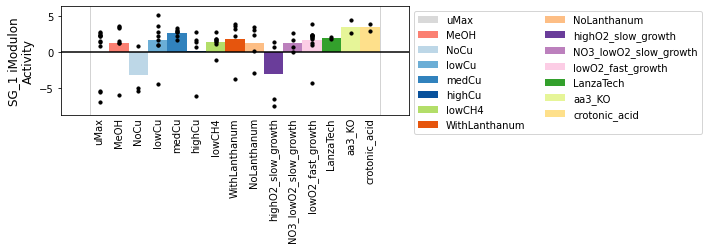

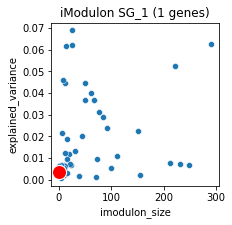

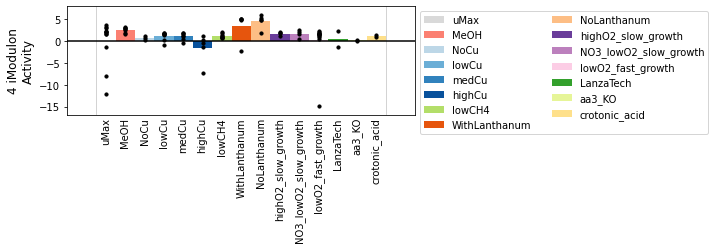

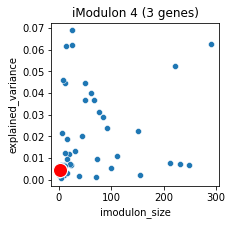

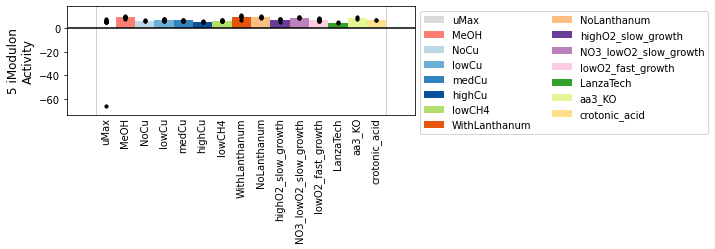

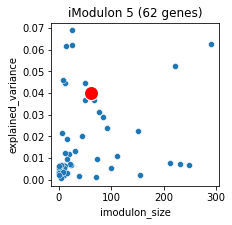

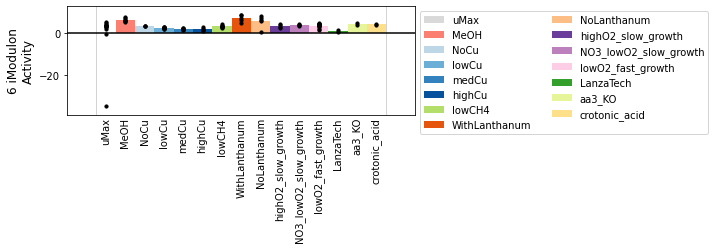

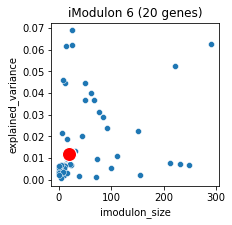

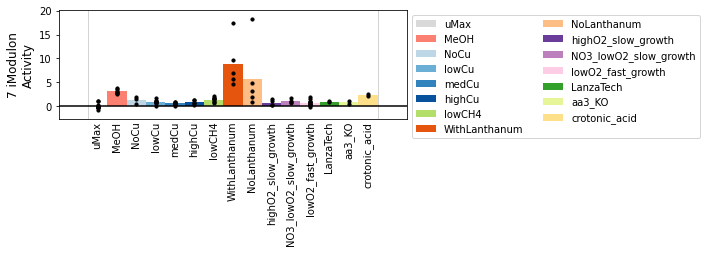

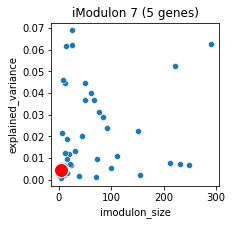

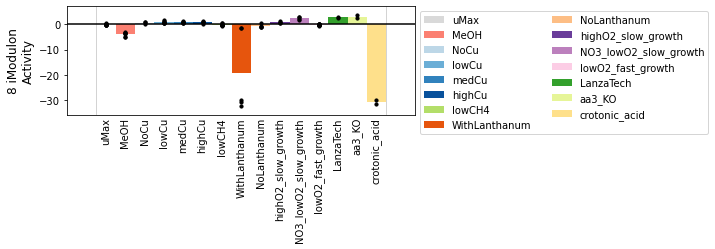

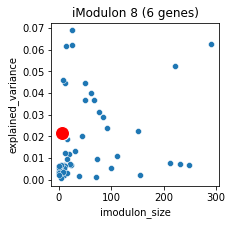

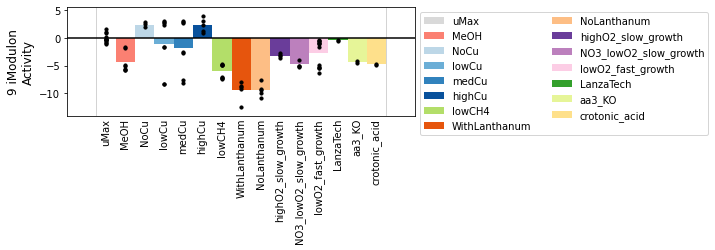

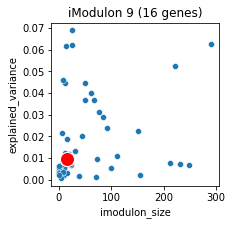

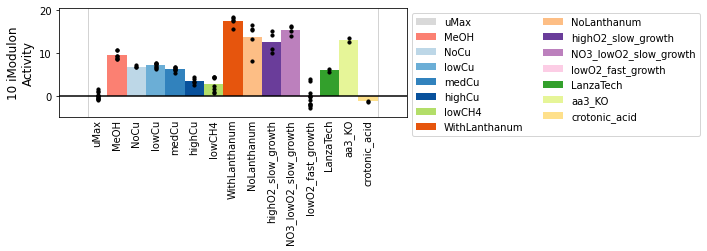

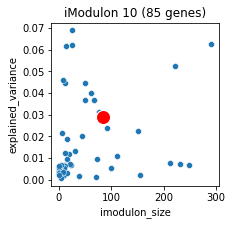

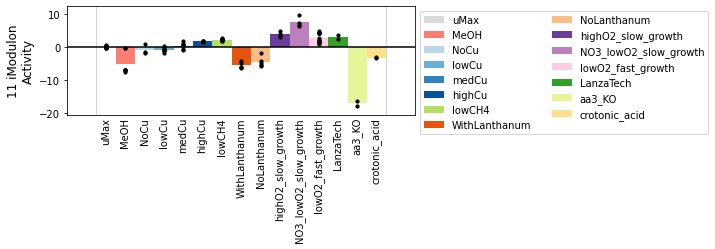

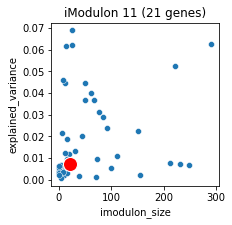

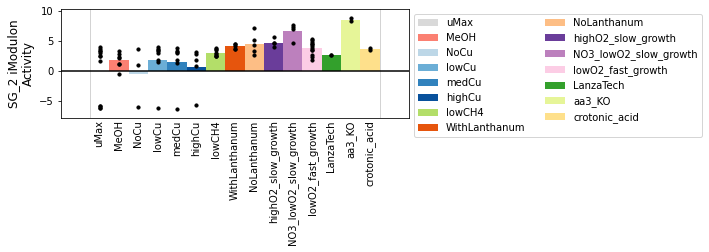

KeyboardInterrupt: 

In [15]:
for mod in ica_data.imodulon_table.index:
    plot_activities_erin(ica_data,mod,assigned_colors=color_spec)
    imod_scatter(ica_data,mod)
    #ica_data.view_imodulon(mod)

# Look one at a time

In [15]:
def imod_info(mod):
    print(f"iModulon {mod}")
    plot_activities_erin(ica_data,mod,assigned_colors=color_spec)
    imod_scatter(ica_data,mod)
    display(DF_enrichments[DF_enrichments.imodulon==mod].sort_values('f1score',ascending=False))
    display(ica_data.view_imodulon(mod))

## iMod 0

iModulon 0


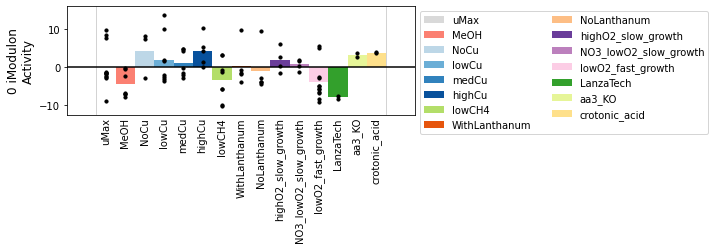

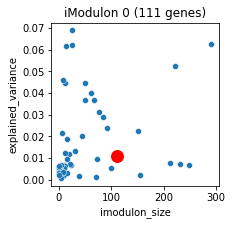

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS00110,0.039180,NaN,25137,25554,1,OsmC family protein,O,"Post-translational modification, protein turno...",A0A4V1IJB6,2817,speD // EQU24_RS00110,WP_017841455.1,||None,NaN,[]
EQU24_RS00165,0.053646,NaN,36832,37129,-1,hypothetical protein,X,No COG annotation,A0A4V1IJB7,2810,EQU24_RS00165,WP_017841444.1,||None,NaN,[]
EQU24_RS00390,0.047510,NaN,82907,83930,1,glycosyltransferase family 4 protein,M,Cell wall/membrane/envelope biogenesis,UPI000344E98D,2777,EQU24_RS00390,WP_017841409.1,||None,phospho-N-acetylmuramoyl-pentapeptide-transfer...,['phospho-N-acetylmuramoyl-pentapeptide-transf...
EQU24_RS00450,0.040135,NaN,95639,95957,1,phosphoribosyl-ATP diphosphatase,E,Amino acid transport and metabolism,A0A4P9UN41,2770,EQU24_RS00450 // hisI // hisF // hisA // hisH ...,WP_017841397.1,||None,phosphoribosyl-ATP diphosphatase activity\ncar...,['phosphoribosyl-ATP diphosphatase activity'\n...
EQU24_RS00455,0.041064,tatA,96158,96371,1,twin-arginine translocase TatA/TatE family sub...,U,"Intracellular trafficking, secretion, and vesi...",A0A4P9UIV2,2769,tatC // tatB // tatA,WP_017841396.1,tatA||tatA,amide transport\npeptide transport\npeptide se...,['amide transport' 'peptide transport' 'peptid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS20900,0.120391,NaN,4708570,4708813,-1,hypothetical protein,X,No COG annotation,A0A4P9USB7,167,EQU24_RS20900 // EQU24_RS20895,WP_017841694.1,||None,NaN,[]
EQU24_RS21260,-0.039489,NaN,4791094,4791280,1,hypothetical protein,X,No COG annotation,NaN,120,EQU24_RS21260,NaN,||,NaN,[]
EQU24_RS21815,0.054058,NaN,4920552,4921551,1,hypothetical protein,X,No COG annotation,A0A4P9USR1,43,EQU24_RS21830 // EQU24_RS21825 // EQU24_RS2182...,WP_017841539.1,||None,NaN,[]
EQU24_RS22125,0.071297,NaN,4994218,4994407,-1,DUF4102 domain-containing protein,L,"Replication, recombination and repair",A0A4P9UVG7,3,EQU24_RS22125,WP_017841476.1,||None,DNA integration\nDNA recombination\nDNA bindin...,['DNA integration' 'DNA recombination' 'DNA bi...


In [16]:
imod = 0
imod_info(imod)

In [19]:
# Update the ica_data object
#ica_data.rename_imodulons({0:'0-uncharacterized_EW'})
ica_data.imodulon_table.loc[0,'category'] = 'uncharacterized'

# seems like a mix of a lot of things... expression pattern not clear...

In [32]:
ica_data.imodulon_table.loc[0,'function'] = 'unclear_EW'
ica_data.imodulon_table.head()

,single_gene,imodulon_size,explained_variance,category,function
0,NaN,111,0.010961,uncharacterized,unclear_EW
1,NaN,23,0.006986,uncharacterized,unclear_EW
2,NaN,44,0.020010,functional,metal-binding-and-transport?_EW
SG_1,True,1,0.003638,single_gene,cas2_EW
4,NaN,3,0.004384,uncharacterized,small_unclear_EW


## iMod 1

iModulon 1


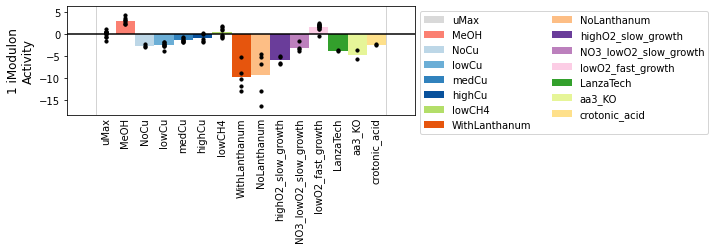

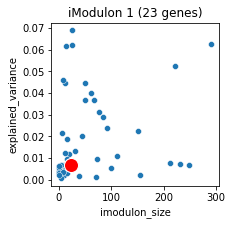

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS00625,0.107857,NaN,129668,131204,1,NaN,X,No COG annotation,NaN,2744,EQU24_RS00625,NaN,||,NaN,[]
EQU24_RS00645,-0.113464,NaN,134999,135115,1,NaN,X,No COG annotation,NaN,448,rrf,NaN,||,NaN,[]
EQU24_RS03550,0.077104,ltrA,760444,761623,-1,group II intron reverse transcriptase/maturase,L,"Replication, recombination and repair",A0A4P9UR40,1224,ltrA,WP_017839828.1,ltrA||ltrA,RNA-templated DNA biosynthetic process\nRNA-di...,['RNA-templated DNA biosynthetic process'\n 'R...
EQU24_RS05645,0.100904,NaN,1220955,1221031,1,NaN,X,No COG annotation,NaN,2123,EQU24_RS05645 // EQU24_RS05640 // EQU24_RS05635,NaN,||,NaN,[]
EQU24_RS05725,0.064302,NaN,1239471,1239672,-1,hypothetical protein,X,No COG annotation,NaN,2112,EQU24_RS05725,NaN,||,integral component of membrane,['integral component of membrane']
EQU24_RS08845,0.073584,NaN,1961613,1962006,-1,type II toxin-antitoxin system HicB family ant...,S,Function unknown,A0A4P9UME7,1710,EQU24_RS08850 // EQU24_RS08845,WP_017839127.1,||None,"regulation of transcription, DNA-templated","['regulation of transcription, DNA-templated']"
EQU24_RS09050,-0.063040,NaN,2000662,2002213,1,IS66 family transposase,L,"Replication, recombination and repair",NaN,1685,EQU24_RS09050,WP_040575330.1,||None,NaN,[]
EQU24_RS09300,-0.069593,ltrA,2056366,2057545,-1,group II intron reverse transcriptase/maturase,L,"Replication, recombination and repair",A0A4P9UR40,1224,ltrA,WP_017839828.1,ltrA||ltrA,RNA-templated DNA biosynthetic process\nRNA-di...,['RNA-templated DNA biosynthetic process'\n 'R...
EQU24_RS09560,-0.100120,NaN,2125956,2126157,1,hypothetical protein,X,No COG annotation,NaN,1618,EQU24_RS09560,WP_235726384.1,||None,NaN,[]
EQU24_RS09835,0.256997,NaN,2185369,2185443,1,NaN,X,No COG annotation,NaN,1582,EQU24_RS09835 // EQU24_RS09830 // EQU24_RS09825,NaN,||,NaN,[]


In [22]:
imod_info(1)

In [31]:
# Update the ICA data object
#ica_data.rename_imodulons({1:'1-uncharacterized_EW'})
ica_data.imodulon_table.loc[1,'function'] = 'unclear_EW'
ica_data.imodulon_table.head()


,single_gene,imodulon_size,explained_variance,category,function
0,NaN,111,0.010961,uncharacterized,uncharacterized_EW
1,NaN,23,0.006986,uncharacterized,unclear_EW
2,NaN,44,0.020010,functional,metal-binding-and-transport?_EW
SG_1,True,1,0.003638,single_gene,cas2_EW
4,NaN,3,0.004384,uncharacterized,small_unclear_EW


## iMod 2

iModulon 2


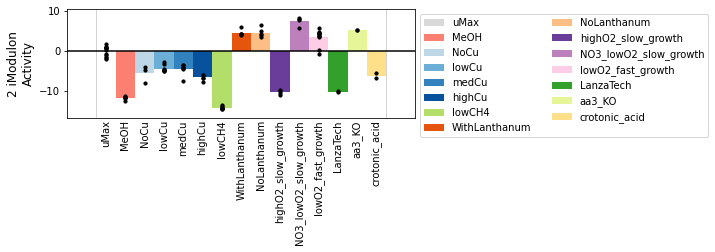

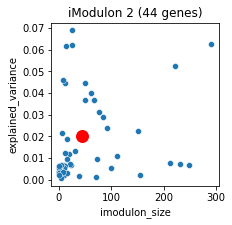

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name
0,2,metallo-sulfur cluster assembly,0.00001,0.042997,0.068182,0.6,0.122449,3.0,5.0,44.0,GO,NaN,NaN,NaN


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS00305,0.111427,NaN,67787,68192,1,response regulator,T,Signal transduction mechanisms,A0A4P9UIC2,2787,EQU24_RS00310 // EQU24_RS00305 // EQU24_RS00300,WP_014146573.1,||None,phosphorelay signal transduction system,['phosphorelay signal transduction system']
EQU24_RS00310,0.081599,NaN,68188,70348,1,GGDEF domain-containing response regulator,T,Signal transduction mechanisms,A0A4P9UK63,2787,EQU24_RS00310 // EQU24_RS00305 // EQU24_RS00300,WP_017841419.1,||None,"regulation of transcription, DNA-templated\nph...","['regulation of transcription, DNA-templated'\..."
EQU24_RS01305,-0.074729,NaN,265994,267545,1,IS66 family transposase,L,"Replication, recombination and repair",NaN,2653,EQU24_RS01305,WP_244310896.1,||None,NaN,[]
EQU24_RS03035,0.105966,yidD,652568,652808,1,membrane protein insertion efficiency factor YidD,S,Function unknown,NaN,2417,yidD,WP_175421656.1,yidD||yidD,plasma membrane,['plasma membrane']
EQU24_RS03040,0.197513,NaN,653037,653427,-1,hypothetical protein,X,No COG annotation,A0A4P9UJY8,2416,EQU24_RS03040,WP_017840915.1,||None,NaN,[]
EQU24_RS04025,-0.059313,sodB,845349,845931,1,superoxide dismutase [Fe],C,Energy production and conversion,A0A4P9UJW8,2324,sodB,WP_017840733.1,sodB||sodB,iron ion binding\ncellular response to superox...,['iron ion binding' 'cellular response to supe...
EQU24_RS06295,0.068112,NaN,1377360,1377993,1,HTH domain-containing protein,K,Transcription,A0A4V1IJM3,2038,EQU24_RS06295,WP_017840301.1,||None,NaN,[]
EQU24_RS06305,0.063336,NaN,1379493,1380189,1,hypothetical protein,S,Function unknown,A0A4P9ULC3,2037,EQU24_RS06305 // EQU24_RS06300,WP_017840300.1,||None,integral component of membrane,['integral component of membrane']
EQU24_RS06665,0.072975,NaN,1465422,1466163,1,hypothetical protein,N,Cell motility,A0A4P9UQS8,1982,EQU24_RS06680 // EQU24_RS06675 // EQU24_RS0667...,WP_017840237.1,||None,NaN,[]
EQU24_RS06670,0.086245,NaN,1466143,1467403,1,hypothetical protein,X,No COG annotation,A0A4P9ULH8,1982,EQU24_RS06680 // EQU24_RS06675 // EQU24_RS0667...,WP_017840236.1,||None,NaN,[]


In [24]:
imod_info(2)

In [34]:
#ica_data.rename_imodulons({2:'2-metal-binding-and-transport?_EW'})
ica_data.imodulon_table.loc[2,'category'] = 'functional'
ica_data.imodulon_table.loc[2,'function'] = 'iron-sulfur-binding-and-transport?_EW'

# enriched go term: metallo-sulfur cluster assembly

In [26]:
ica_data.imodulon_table.head()

,single_gene,imodulon_size,explained_variance,category,function
0,NaN,111,0.010961,uncharacterized,uncharacterized_EW
1,NaN,23,0.006986,uncharacterized,uncharacterized_EW
2,NaN,44,0.020010,functional,metal-binding-and-transport?_EW
SG_1,True,1,0.003638,single_gene,NaN
4,NaN,3,0.004384,uncharacterized,NaN


### iModulon 3


iModulon SG_1


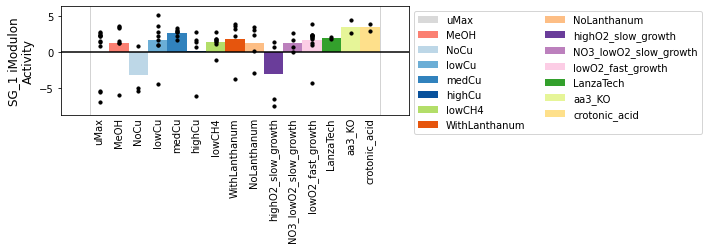

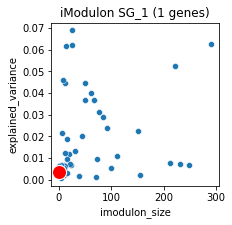

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS12140,0.712914,cas2,2713901,2714186,-1,CRISPR-associated endonuclease Cas2,L,"Replication, recombination and repair",A0A4P9UNK1,1307,cas2 // cas1 // EQU24_RS12130 // cas2,WP_017839245.1,cas2||cas2,"RNA phosphodiester bond hydrolysis, endonucleo...","['RNA phosphodiester bond hydrolysis, endonucl..."


In [27]:
#imod_info(3)
imod_info('SG_1')

In [28]:
ica_data.imodulon_table.loc['SG_1','function'] = 'cas2_EW'
ica_data.imodulon_table.head()


,single_gene,imodulon_size,explained_variance,category,function
0,NaN,111,0.010961,uncharacterized,uncharacterized_EW
1,NaN,23,0.006986,uncharacterized,uncharacterized_EW
2,NaN,44,0.020010,functional,metal-binding-and-transport?_EW
SG_1,True,1,0.003638,single_gene,cas2_EW
4,NaN,3,0.004384,uncharacterized,NaN


## iMod 4

iModulon 4


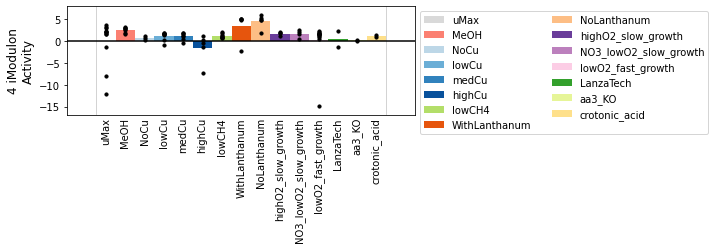

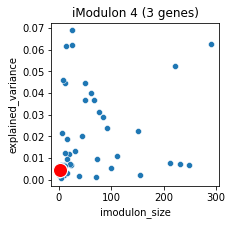

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS18585,0.289296,NaN,4149200,4149536,1,hypothetical protein,L,"Replication, recombination and repair",NaN,484,EQU24_RS18590 // EQU24_RS18585,NaN,||,DNA binding\ntransposase activity\ntranspositi...,['DNA binding' 'transposase activity' 'transpo...
EQU24_RS20510,0.509493,NaN,4626446,4626638,-1,hypothetical protein,X,No COG annotation,NaN,227,EQU24_RS20510 // EQU24_RS20505,NaN,||,integral component of membrane,['integral component of membrane']
EQU24_RS20765,0.311459,NaN,4677500,4678028,-1,phosphatase PAP2 family protein,I,Lipid transport and metabolism,A0A4P9US91,191,EQU24_RS20765 // EQU24_RS20760,WP_017841722.1,||None,integral component of membrane,['integral component of membrane']


In [29]:
imod_info(4)

In [30]:
ica_data.imodulon_table.loc[4,'function'] = 'small_unclear_EW'


## iMod 5

iModulon 5


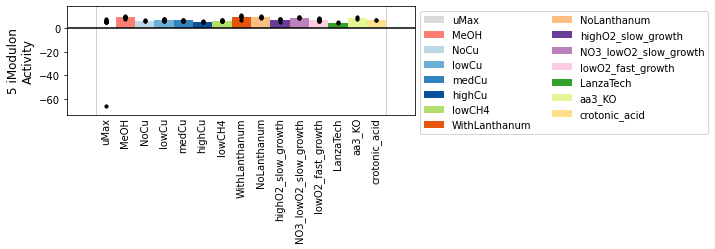

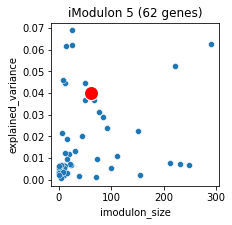

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS00075,0.163730,tatB,19487,19799,1,twin-arginine translocase subunit TatB,U,"Intracellular trafficking, secretion, and vesi...",A0A4P9UII1,2822,tatB // tatA,WP_017841462.1,tatB||tatB,peptide transport\namide transport\norganic su...,['peptide transport' 'amide transport' 'organi...
EQU24_RS00180,0.090058,NaN,40588,41767,1,ISAzo13 family transposase,L,"Replication, recombination and repair",UPI00110C954A,2807,EQU24_RS00180,WP_138767046.1,||None,DNA binding,['DNA binding']
EQU24_RS00190,0.152318,NaN,42656,42884,-1,hypothetical protein,X,No COG annotation,UPI00110D139D,2805,EQU24_RS00195 // EQU24_RS00190,WP_138767047.1,||None,DNA binding\ntransposase activity\ntranspositi...,['DNA binding' 'transposase activity' 'transpo...
EQU24_RS01120,0.150378,NaN,229638,229887,-1,hypothetical protein,X,No COG annotation,A0A4P9UIY2,2674,EQU24_RS01120,WP_017841274.1,||None,NaN,[]
EQU24_RS01165,0.149304,NaN,235384,235645,-1,hypothetical protein,C,Energy production and conversion,NaN,2669,EQU24_RS01165 // EQU24_RS01160,NaN,||,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS19100,0.146372,NaN,4273940,4274030,-1,hypothetical protein,X,No COG annotation,NaN,414,EQU24_RS19100,NaN,||,NaN,[]
EQU24_RS19665,0.113909,NaN,4420900,4421098,1,hypothetical protein,X,No COG annotation,NaN,334,EQU24_RS19665,NaN,||,NaN,[]
EQU24_RS19915,0.144770,NaN,4474858,4475002,1,hypothetical protein,X,No COG annotation,NaN,304,EQU24_RS19915,NaN,||,nucleotide binding\nintegral component of memb...,['nucleotide binding' 'integral component of m...
EQU24_RS21260,0.079839,NaN,4791094,4791280,1,hypothetical protein,X,No COG annotation,NaN,120,EQU24_RS21260,NaN,||,NaN,[]


In [33]:
imod_info(5)

In [ ]:
ica_data.imodulon_table.loc[5,'function'] = 'FM20_TR1_QC-outlier-response_EW'


## iMod 6

iModulon 6


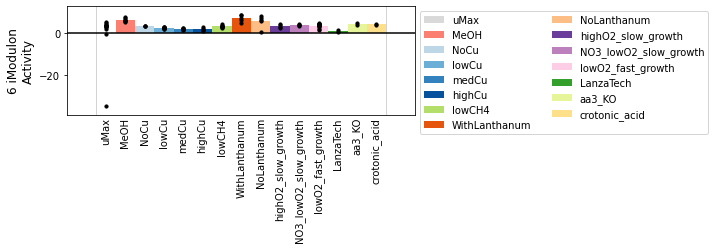

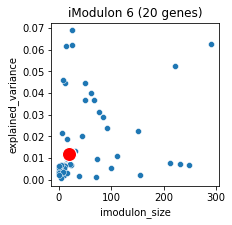

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name
1,6,transposase activity,0.000005,0.012283,0.25,0.087719,0.129870,5.0,57.0,20.0,GO,NaN,NaN,NaN
2,6,"transposition, DNA-mediated",0.000006,0.012283,0.25,0.084746,0.126582,5.0,59.0,20.0,GO,NaN,NaN,NaN


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS00145,0.200061,NaN,34142,34445,-1,hypothetical protein,J,"Translation, ribosomal structure and biogenesis",A0A4P9UL47,2812,EQU24_RS00155 // EQU24_RS00150 // EQU24_RS00145,WP_014146553.1,||None,response to osmotic stress\nresponse to abioti...,['response to osmotic stress' 'response to abi...
EQU24_RS00250,0.249150,NaN,50778,51069,1,hypothetical protein,X,No COG annotation,A0A4P9UIB5,2796,EQU24_RS00250,WP_017841431.1,||None,integral component of membrane,['integral component of membrane']
EQU24_RS03455,-0.108123,NaN,734828,735008,-1,hypothetical protein,X,No COG annotation,NaN,2375,EQU24_RS03455,NaN,||,NaN,[]
EQU24_RS04120,0.170696,NaN,864711,865458,1,AAA family ATPase,L,"Replication, recombination and repair",A0A4P9UK85,2313,EQU24_RS04120 // EQU24_RS04115,WP_017840713.1,||istB,ATP binding,['ATP binding']
EQU24_RS06205,0.148312,NaN,1352804,1353026,-1,hypothetical protein,X,No COG annotation,NaN,2050,EQU24_RS06205,NaN,||,phosphorelay signal transduction system\ninteg...,['phosphorelay signal transduction system'\n '...
EQU24_RS08030,0.144965,NaN,1772272,1773559,-1,IS4 family transposase,L,"Replication, recombination and repair",NaN,1821,EQU24_RS08030,WP_244310909.1,||None,DNA binding\ntransposase activity\ntranspositi...,['DNA binding' 'transposase activity' 'transpo...
EQU24_RS08840,0.219171,NaN,1960369,1961011,-1,transposase,X,No COG annotation,UPI00110D0B97,1711,EQU24_RS08840,WP_138767140.1,||None,DNA binding\ntransposase activity\ntranspositi...,['DNA binding' 'transposase activity' 'transpo...
EQU24_RS08855,0.119670,NaN,1962417,1963410,1,hypothetical protein,S,Function unknown,A0A4P9UM20,1709,EQU24_RS08855,WP_017839829.1,||None,NaN,[]
EQU24_RS09155,0.149698,NaN,2027636,2027831,-1,hypothetical protein,X,No COG annotation,NaN,1672,EQU24_RS09155,NaN,||,NaN,[]
EQU24_RS10680,0.114705,NaN,2374756,2375617,-1,IS4 family transposase,L,"Replication, recombination and repair",UPI0015862106,1488,EQU24_RS10685 // EQU24_RS10680,WP_175421679.1,||None,DNA binding\ntransposase activity\ntranspositi...,['DNA binding' 'transposase activity' 'transpo...


In [35]:
imod_info(6)

In [36]:
ica_data.imodulon_table.loc[6,'function'] = 'transposase/FM03_TR1_QC-outlier-response_EW'


## iMod 7

iModulon 7


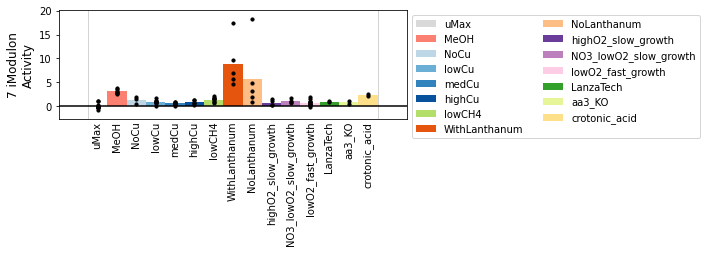

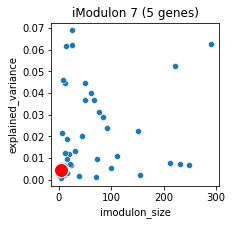

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS00625,0.191481,NaN,129668,131204,1,NaN,X,No COG annotation,NaN,2744,EQU24_RS00625,NaN,||,NaN,[]
EQU24_RS00640,0.245683,NaN,131804,134725,1,NaN,X,No COG annotation,NaN,2742,EQU24_RS00640,NaN,||,NaN,[]
EQU24_RS02055,-0.333334,NaN,432512,434726,1,TonB-dependent receptor,P,Inorganic ion transport and metabolism,NaN,2549,EQU24_RS02055,WP_235726409.1,||None,cell outer membrane\nintegral component of mem...,['cell outer membrane' 'integral component of ...
EQU24_RS18840,0.254045,NaN,4208298,4211219,-1,NaN,X,No COG annotation,NaN,447,EQU24_RS18840,NaN,||,NaN,[]
EQU24_RS18855,0.315433,NaN,4211819,4213355,-1,NaN,X,No COG annotation,NaN,446,EQU24_RS18855 // EQU24_RS18850 // EQU24_RS18845,NaN,||,NaN,[]


In [37]:
imod_info(7)

In [38]:
ica_data.imodulon_table.loc[7,'function'] = 'TonB-receptor/up-in-both-La-vials_EW'


## iMod 8

iModulon 8


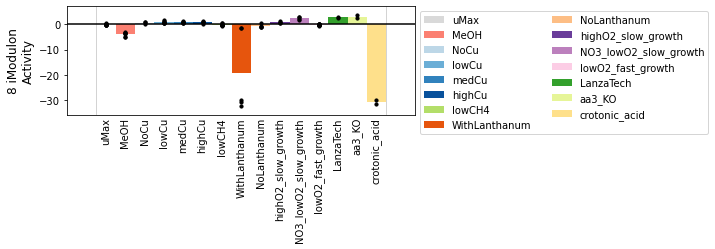

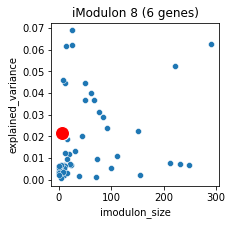

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name
3,8,alcohol dehydrogenase (cytochrome c(L)) activity,0.000002,0.006937,0.333333,1.000000,0.500000,2.0,6.0,6.0,GO,NaN,NaN,NaN
1,8,NaN,0.000047,0.005965,0.333333,0.250000,0.285714,2.0,8.0,6.0,KEGG pathways,map00625,Chloroalkane and chloroalkene degradation,NaN
0,8,NaN,0.000153,0.051911,0.333333,0.142857,0.200000,2.0,14.0,6.0,KEGG modules,M00174,NaN,"Methane oxidation, methanotroph, methane => fo..."
4,8,periplasmic space,0.000043,0.088762,0.500000,0.053571,0.096774,3.0,56.0,6.0,GO,NaN,NaN,NaN
0,8,NaN,0.000002,0.000381,0.666667,0.051948,0.096386,4.0,77.0,6.0,KEGG pathways,map00680,Methane metabolism,NaN
3,8,NaN,0.001042,0.065929,0.333333,0.055556,0.095238,2.0,36.0,6.0,KEGG pathways,map00010,Glycolysis / Gluconeogenesis,NaN
2,8,NaN,0.000284,0.023921,0.666667,0.013937,0.027304,4.0,287.0,6.0,KEGG pathways,map01120,Microbial metabolism in diverse environments,NaN


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS18110,0.251437,mxaS,4038027,4038882,-1,MxaS protein,S,Function unknown,A0A4P9UU55,545,EQU24_RS18115 // EQU24_RS18110,WP_017842211.1,||None,NaN,[]
EQU24_RS18120,0.253628,moxR,4040146,4041163,-1,MoxR family ATPase,S,Function unknown,A0A4P9UTL4,544,EQU24_RS18120,WP_017842209.1,||None,ATP hydrolysis activity\nATP binding\ncytoplas...,['ATP hydrolysis activity' 'ATP binding' 'cyto...
EQU24_RS18125,0.307085,moxI,4041358,4041643,-1,methanol dehydrogenase,M,Cell wall/membrane/envelope biogenesis,A0A4P9UR50,543,moxJ // moxG // EQU24_RS18125,WP_017842208.1,||None,alcohol dehydrogenase (NAD+) activity\nmethano...,['alcohol dehydrogenase (NAD+) activity' 'meth...
EQU24_RS18130,0.334695,moxG,4041660,4042134,-1,"cytochrome c(L), periplasmic",C,Energy production and conversion,A0A4V1IK77,543,moxJ // moxG // EQU24_RS18125,WP_017842207.1,moxG||moxG,iron ion binding\nheme binding\nelectron trans...,['iron ion binding' 'heme binding' 'electron t...
EQU24_RS18135,0.338053,moxJ,4042150,4042996,-1,methanol oxidation system protein MoxJ,E,Amino acid transport and metabolism,A0A4P9UW33,543,moxJ // moxG // EQU24_RS18125,WP_017842206.1,moxJ||moxJ,methanol catabolic process\nperiplasmic space,['methanol catabolic process' 'periplasmic spa...
EQU24_RS18140,0.342458,moxF,4043061,4044870,-1,"PQQ-dependent dehydrogenase, methanol/ethanol ...",G,Carbohydrate transport and metabolism,A0A4P9URC6,542,EQU24_RS18140,WP_017842205.1,||None,calcium ion binding\nalcohol dehydrogenase (cy...,['calcium ion binding' 'alcohol dehydrogenase ...


In [39]:
imod_info(8)

In [42]:
ica_data.imodulon_table.loc[8,'category'] = 'functional'
ica_data.imodulon_table.loc[8,'function'] = 'mxa-gene-cluster_EW'
ica_data.change_threshold(8, 0.14)


In [43]:
ica_data.imodulon_table.head(10)

,single_gene,imodulon_size,explained_variance,category,function
0,NaN,111,0.010961,uncharacterized,unclear_EW
1,NaN,23,0.006986,uncharacterized,unclear_EW
2,NaN,44,0.020010,functional,iron-sulfur-binding-and-transport?_EW
SG_1,True,1,0.003638,single_gene,cas2_EW
4,NaN,3,0.004384,uncharacterized,small_unclear_EW
5,NaN,62,0.040222,uncharacterized,NaN
6,NaN,20,0.011649,uncharacterized,transposase/FM03_TR1_QC-outlier-response_EW
7,NaN,5,0.004450,uncharacterized,TonB-receptor/up-in-both-La-vials_EW
8,NaN,6,0.021518,functional,mxa-gene-cluster_EW
9,NaN,16,0.009330,uncharacterized,NaN


## iMod 9

iModulon 9


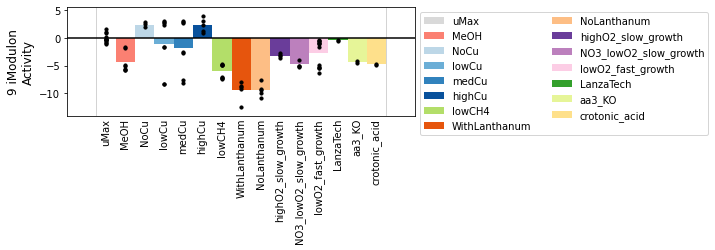

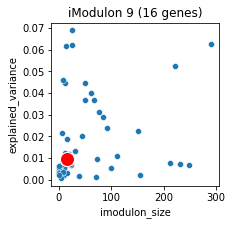

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name
8,9,'de novo' post-translational protein folding,7.228814e-15,6.897545e-12,0.3750,0.857143,0.521739,6.0,7.0,16.0,GO,NaN,NaN,NaN
9,9,chaperone cofactor-dependent protein refolding,7.228814e-15,6.897545e-12,0.3750,0.857143,0.521739,6.0,7.0,16.0,GO,NaN,NaN,NaN
11,9,'de novo' protein folding,8.639256e-14,5.063838e-11,0.3750,0.666667,0.480000,6.0,9.0,16.0,GO,NaN,NaN,NaN
5,9,unfolded protein binding,2.264415e-16,9.290893e-13,0.5000,0.444444,0.470588,8.0,18.0,16.0,GO,NaN,NaN,NaN
13,9,viral process,8.276806e-12,3.773304e-09,0.3125,0.714286,0.434783,5.0,7.0,16.0,GO,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,9,cellular_component,8.652295e-05,4.226234e-03,0.6875,0.011777,0.023158,11.0,934.0,16.0,GO,NaN,NaN,NaN
72,9,biological_process,3.369911e-05,2.033345e-03,0.7500,0.011483,0.022620,12.0,1045.0,16.0,GO,NaN,NaN,NaN
101,9,cellular process,3.332986e-04,1.409819e-02,0.6250,0.011429,0.022447,10.0,875.0,16.0,GO,NaN,NaN,NaN
94,9,molecular_function,1.424609e-04,6.494633e-03,0.6875,0.011190,0.022022,11.0,983.0,16.0,GO,NaN,NaN,NaN


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS01215,-0.099586,NaN,244910,246461,-1,IS66 family transposase,L,"Replication, recombination and repair",NaN,2664,EQU24_RS01215,WP_040575330.1,||None,NaN,[]
EQU24_RS06210,0.102813,NaN,1353125,1353620,-1,hypothetical protein,L,"Replication, recombination and repair",NaN,2049,EQU24_RS06210,WP_017840317.1,||None,DNA binding\ntransposase activity\ntranspositi...,['DNA binding' 'transposase activity' 'transpo...
EQU24_RS08645,0.144326,moeB,1914913,1915657,-1,molybdopterin-synthase adenylyltransferase MoeB,H,Coenzyme transport and metabolism,A0A4P9ULY6,1738,moeB,WP_017839871.1,moeB||moeB,molybdopterin-synthase adenylyltransferase act...,['molybdopterin-synthase adenylyltransferase a...
EQU24_RS08650,0.264743,groS,1915795,1916083,1,co-chaperone GroES,O,"Post-translational modification, protein turno...",A0A4P9UP67,1737,EQU24_RS08650,WP_017839870.1,||groES,ATP binding\nmetal ion binding\nGroEL-GroES co...,['ATP binding' 'metal ion binding' 'GroEL-GroE...
EQU24_RS08655,0.261296,groL,1916139,1917798,1,chaperonin GroEL,O,"Post-translational modification, protein turno...",A0A4P9UPY3,1736,groL,WP_017839869.1,groL||groL,ATP hydrolysis activity\npositive regulation o...,['ATP hydrolysis activity'\n 'positive regulat...
EQU24_RS08660,0.183396,NaN,1917885,1918140,1,transcriptional regulator,K,Transcription,A0A4P9UM01,1735,EQU24_RS08660,WP_017839868.1,||None,NaN,[]
EQU24_RS11535,0.140113,dapB,2577532,2578339,-1,4-hydroxy-tetrahydrodipicolinate reductase,E,Amino acid transport and metabolism,A0A4P9UTC8,1377,dnaJ // dapB,WP_026130014.1,dapB||dapB,lysine biosynthetic process via diaminopimelat...,['lysine biosynthetic process via diaminopimel...
EQU24_RS11540,0.146958,dnaJ,2578344,2579490,-1,molecular chaperone DnaJ,O,"Post-translational modification, protein turno...",A0A4P9UQG4,1377,dnaJ // dapB,WP_017839359.1,dnaJ||dnaJ,regulation of nucleic acid-templated transcrip...,['regulation of nucleic acid-templated transcr...
EQU24_RS11545,0.156558,dnaK,2579645,2581580,-1,molecular chaperone DnaK,O,"Post-translational modification, protein turno...",A0A4P9UN97,1376,dnaK,WP_017839358.1,dnaK||dnaK,regulation of nucleic acid-templated transcrip...,['regulation of nucleic acid-templated transcr...
EQU24_RS11550,0.143848,grpE,2581650,2582298,-1,nucleotide exchange factor GrpE,O,"Post-translational modification, protein turno...",A0A4V1IJW3,1375,grpE,WP_017839357.1,grpE||grpE,protein-containing complex assembly\nadenyl nu...,['protein-containing complex assembly' 'adenyl...


In [44]:
imod_info(9)

In [45]:
ica_data.imodulon_table.loc[9,'category'] = 'functional'
ica_data.imodulon_table.loc[9,'function'] = 'groEL/ES-post-translation-mod_EW'


## iMod 10

iModulon 10


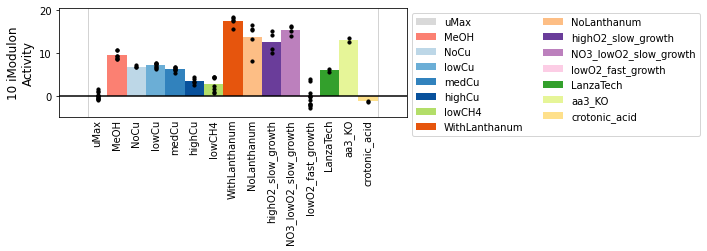

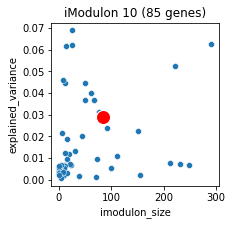

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name
110,10,cobalamin biosynthetic process,2.501132e-13,1.026214e-09,0.117647,0.555556,0.194175,10.0,18.0,85.0,GO,NaN,NaN,NaN
17,10,NaN,6.962008e-12,1.761388e-09,0.152941,0.260000,0.192593,13.0,50.0,85.0,KEGG pathways,map00860,Porphyrin metabolism,NaN
9,10,NaN,8.555724e-04,3.232163e-02,0.047059,0.181818,0.074766,4.0,22.0,85.0,KEGG modules,M00121,NaN,"Heme biosynthesis, plants and bacteria, glutam..."
1,10,NaN,7.930695e-06,1.348218e-03,0.035294,1.000000,0.068182,3.0,3.0,85.0,KEGG modules,M00641,NaN,"Multidrug resistance, efflux pump MexEF-OprN"
2,10,NaN,7.930695e-06,1.348218e-03,0.035294,1.000000,0.068182,3.0,3.0,85.0,KEGG modules,M00642,NaN,"Multidrug resistance, efflux pump MexJK-OprM"
3,10,NaN,3.125937e-05,3.542729e-03,0.035294,0.750000,0.067416,3.0,4.0,85.0,KEGG modules,M00769,NaN,"Multidrug resistance, efflux pump MexPQ-OpmE"
4,10,NaN,4.023633e-04,1.710044e-02,0.023529,1.000000,0.045977,2.0,2.0,85.0,KEGG modules,M00245,NaN,NaN
5,10,NaN,4.023633e-04,1.710044e-02,0.023529,1.000000,0.045977,2.0,2.0,85.0,KEGG modules,M00246,NaN,NaN
6,10,NaN,4.023633e-04,1.710044e-02,0.023529,1.000000,0.045977,2.0,2.0,85.0,KEGG modules,M00698,NaN,"Multidrug resistance, efflux pump BpeEF-OprC"
7,10,NaN,4.023633e-04,1.710044e-02,0.023529,1.000000,0.045977,2.0,2.0,85.0,KEGG modules,M00767,NaN,NaN


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS00075,0.063746,tatB,19487,19799,1,twin-arginine translocase subunit TatB,U,"Intracellular trafficking, secretion, and vesi...",A0A4P9UII1,2822,tatB // tatA,WP_017841462.1,tatB||tatB,peptide transport\namide transport\norganic su...,['peptide transport' 'amide transport' 'organi...
EQU24_RS00670,-0.055578,NaN,139733,140330,1,hypothetical protein,X,No COG annotation,A0A4P9ULC6,2740,EQU24_RS00670,WP_017841358.1,||None,NaN,[]
EQU24_RS01375,-0.054295,NaN,286650,287097,-1,hypothetical protein,X,No COG annotation,A0A4P9ULN4,2643,EQU24_RS01375,WP_017841222.1,||None,NaN,[]
EQU24_RS01455,0.046367,NaN,302485,302698,-1,formate dehydrogenase subunit delta,C,Energy production and conversion,A0A4P9UIZ0,2630,EQU24_RS01455,WP_014146724.1,||None,oxidoreductase activity\n,['oxidoreductase activity' '']
EQU24_RS01670,0.048319,NaN,352356,352530,-1,DUF2292 domain-containing protein,X,No COG annotation,A0A4P9UJ24,2600,EQU24_RS01670,WP_014146765.1,||None,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS21445,0.041489,NaN,4828409,4828703,1,STAS domain-containing protein,T,Signal transduction mechanisms,A0A4P9USJ5,91,EQU24_RS21450 // EQU24_RS21445,WP_017841598.1,||None,NaN,[]
EQU24_RS21645,0.046942,NaN,4886529,4886943,-1,hypothetical protein,X,No COG annotation,UPI00034CBEF0,65,EQU24_RS21645,WP_138767255.1,||None,integral component of membrane,['integral component of membrane']
EQU24_RS21950,-0.055511,NaN,4951896,4953342,1,sigma-70 family RNA polymerase sigma factor,K,Transcription,UPI00034C420F,26,EQU24_RS21950,WP_175421718.1,||None,"regulation of DNA-templated transcription, ini...","['regulation of DNA-templated transcription, i..."
EQU24_RS21955,-0.057109,hflK,4953432,4954593,1,FtsH protease activity modulator HflK,O,"Post-translational modification, protein turno...",A0A4P9USU2,25,hflB // hflC // hflK,WP_017841512.1,hflK||hflK,integral component of external side of plasma ...,['integral component of external side of plasm...


In [46]:
imod_info(10)

In [47]:
ica_data.imodulon_table.loc[10,'function'] = 'multi-drug-resistance/efflux-pump_EW'


## iMod 11

iModulon 11


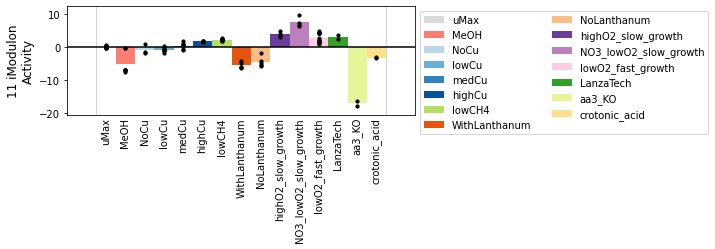

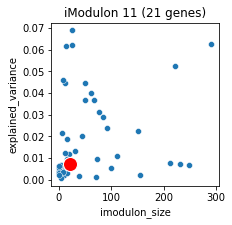

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name
10,11,NaN,1.067918e-07,0.000036,0.142857,1.000000,0.250000,3.0,3.0,21.0,KEGG modules,M00641,NaN,"Multidrug resistance, efflux pump MexEF-OprN"
11,11,NaN,4.257973e-07,0.000072,0.142857,0.750000,0.240000,3.0,4.0,21.0,KEGG modules,M00769,NaN,"Multidrug resistance, efflux pump MexPQ-OpmE"
12,11,NaN,2.366843e-05,0.001609,0.095238,1.000000,0.173913,2.0,2.0,21.0,KEGG modules,M00698,NaN,"Multidrug resistance, efflux pump BpeEF-OprC"
13,11,NaN,2.366843e-05,0.001609,0.095238,1.000000,0.173913,2.0,2.0,21.0,KEGG modules,M00767,NaN,NaN
14,11,NaN,2.366843e-05,0.001609,0.095238,1.000000,0.173913,2.0,2.0,21.0,KEGG modules,M00768,NaN,NaN
18,11,NaN,1.411576e-04,0.035713,0.095238,0.500000,0.160000,2.0,4.0,21.0,KEGG pathways,map00909,Sesquiterpenoid and triterpenoid biosynthesis,NaN
15,11,NaN,4.896094e-04,0.027745,0.095238,0.285714,0.142857,2.0,7.0,21.0,KEGG modules,M00155,NaN,"Cytochrome c oxidase, prokaryotes"
16,11,NaN,1.786023e-03,0.086750,0.095238,0.153846,0.117647,2.0,13.0,21.0,KEGG modules,M00096,NaN,"C5 isoprenoid biosynthesis, non-mevalonate pat..."


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS01635,-0.090892,NaN,344368,345238,1,EAL domain-containing protein,T,Signal transduction mechanisms,A0A4P9UJC3,2604,EQU24_RS01640 // EQU24_RS01635,WP_017841179.1,||None,cellular response to DNA damage stimulus\ncell...,['cellular response to DNA damage stimulus' 'c...
EQU24_RS01670,-0.127505,NaN,352356,352530,-1,DUF2292 domain-containing protein,X,No COG annotation,A0A4P9UJ24,2600,EQU24_RS01670,WP_014146765.1,||None,NaN,[]
EQU24_RS08770,0.110909,NaN,1943066,1944929,-1,1-deoxy-D-xylulose-5-phosphate synthase,H,Coenzyme transport and metabolism,A0A4P9UP60,1721,EQU24_RS08770,WP_017839846.1,||dxs,pyruvate metabolic process\nubiquinone biosynt...,['pyruvate metabolic process' 'ubiquinone bios...
EQU24_RS08775,0.132613,NaN,1944983,1946624,-1,copper resistance protein,P,Inorganic ion transport and metabolism,A0A4P9UM38,1720,EQU24_RS08785 // EQU24_RS08780 // EQU24_RS08775,WP_017839845.1,||None,copper ion transport\nintegral component of me...,['copper ion transport' 'integral component of...
EQU24_RS08780,0.132006,NaN,1946634,1946991,-1,copper resistance protein CopC,S,Function unknown,A0A4V1IJR5,1720,EQU24_RS08785 // EQU24_RS08780 // EQU24_RS08775,WP_017839844.1,||None,copper ion binding\nresponse to copper ion\npe...,['copper ion binding' 'response to copper ion'...
EQU24_RS08785,0.125050,NaN,1947024,1949652,-1,MMPL family transporter,S,Function unknown,A0A4P9URM7,1720,EQU24_RS08785 // EQU24_RS08780 // EQU24_RS08775,WP_017839843.1,||None,integral component of membrane,['integral component of membrane']
EQU24_RS10820,0.115269,NaN,2404406,2405621,1,efflux RND transporter periplasmic adaptor sub...,M,Cell wall/membrane/envelope biogenesis,A0A4P9UMU8,1466,EQU24_RS10830 // EQU24_RS10825 // EQU24_RS10820,WP_017839488.1,||None,transmembrane transporter activity\ntransmembr...,['transmembrane transporter activity' 'transme...
EQU24_RS10825,0.115890,NaN,2405627,2408813,1,multidrug efflux RND transporter permease subunit,V,Defense mechanisms,A0A4P9UQ36,1466,EQU24_RS10830 // EQU24_RS10825 // EQU24_RS10820,WP_017839487.1,||None,xenobiotic transport\nefflux transmembrane tra...,['xenobiotic transport' 'efflux transmembrane ...
EQU24_RS10830,0.089986,NaN,2408812,2410279,1,efflux transporter outer membrane subunit,M,Cell wall/membrane/envelope biogenesis,NaN,1466,EQU24_RS10830 // EQU24_RS10825 // EQU24_RS10820,WP_017839486.1,||None,cell outer membrane\nefflux transmembrane tran...,['cell outer membrane' 'efflux transmembrane t...
EQU24_RS10985,-0.083312,NaN,2450472,2451114,-1,DUF4255 domain-containing protein,S,Function unknown,A0A4P9UMX6,1457,EQU24_RS10985 // EQU24_RS10980 // EQU24_RS10975,WP_017839460.1,||None,NaN,[]


In [48]:
imod_info(11)

In [49]:
ica_data.imodulon_table.loc[11,'function'] = 'multi-drug-resistance/efflux-pump/low-activity-aa3KO_EW'


## iMod 12

iModulon SG_2


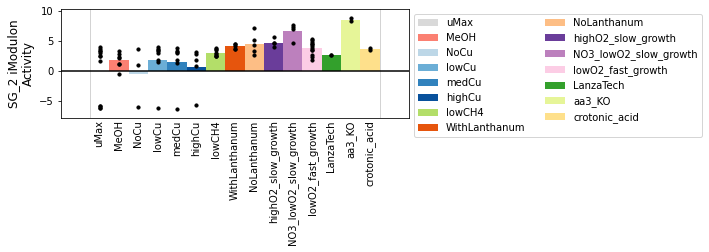

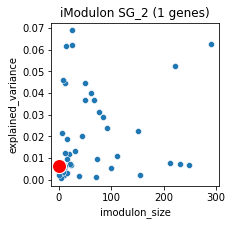

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS17330,0.743204,NaN,3884125,3884449,-1,(2Fe-2S) ferredoxin domain-containing protein,C,Energy production and conversion,A0A4P9UTU3,638,EQU24_RS17330 // EQU24_RS17325 // EQU24_RS1732...,WP_017842361.1,||None,NaN,[]


In [51]:
imod_info('SG_2')

In [52]:
ica_data.imodulon_table.loc["SG_2",'function'] = 'ferrdoxin_domain_EW'


## iMod 13

iModulon 13


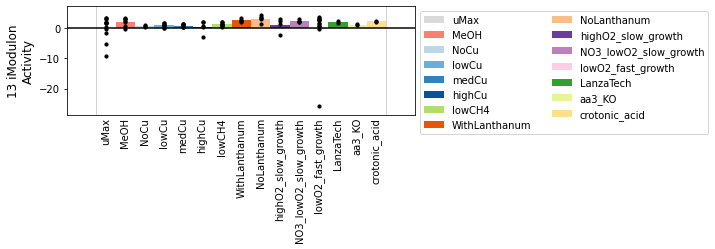

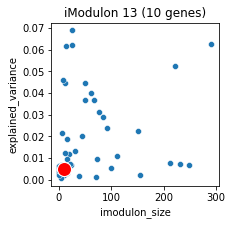

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS01175,0.168744,umuD,237101,237485,-1,translesion error-prone DNA polymerase V autop...,K,Transcription,UPI00191C1247,2668,umuD // EQU24_RS01170,WP_201764864.1,umuD||umuD,"regulation of transcription, DNA-templated\nDN...","['regulation of transcription, DNA-templated' ..."
EQU24_RS01555,0.194751,NaN,328948,329197,1,hypothetical protein,X,No COG annotation,NaN,2616,EQU24_RS01555,NaN,||,integral component of membrane,['integral component of membrane']
EQU24_RS03435,0.253236,NaN,731708,731891,-1,hypothetical protein,X,No COG annotation,NaN,2379,EQU24_RS03435,NaN,||,NaN,[]
EQU24_RS03455,0.302955,NaN,734828,735008,-1,hypothetical protein,X,No COG annotation,NaN,2375,EQU24_RS03455,NaN,||,NaN,[]
EQU24_RS08710,0.177812,NaN,1931194,1931374,1,hypothetical protein,X,No COG annotation,NaN,1728,EQU24_RS08720 // EQU24_RS08715 // EQU24_RS08710,NaN,||,NaN,[]
EQU24_RS10685,0.270555,NaN,2375624,2376014,-1,hypothetical protein,X,No COG annotation,A0A4P9UQ25,1488,EQU24_RS10685 // EQU24_RS10680,WP_040575281.1,||None,DNA binding\ntransposase activity\ntranspositi...,['DNA binding' 'transposase activity' 'transpo...
EQU24_RS11990,0.203715,NaN,2680903,2681857,-1,IS1595 family transposase,L,"Replication, recombination and repair",A0A4P9UQQ5,1320,EQU24_RS11990 // EQU24_RS11985,WP_017839276.1,||None,integral component of membrane,['integral component of membrane']
EQU24_RS14930,0.130317,NaN,3328929,3329181,-1,hypothetical protein,X,No COG annotation,NaN,947,EQU24_RS14930,NaN,||,integral component of membrane,['integral component of membrane']
EQU24_RS16380,0.281520,NaN,3678261,3678483,-1,hypothetical protein,X,No COG annotation,A0A4P9UQD6,753,EQU24_RS16380,WP_017842548.1,||None,NaN,[]
EQU24_RS21260,0.230291,NaN,4791094,4791280,1,hypothetical protein,X,No COG annotation,NaN,120,EQU24_RS21260,NaN,||,NaN,[]


In [53]:
imod_info(13)

In [54]:
ica_data.imodulon_table.loc[13,'function'] = 'transposase/FM11_TR1_QC-outlier-response_EW'


## iMod 14

iModulon 14


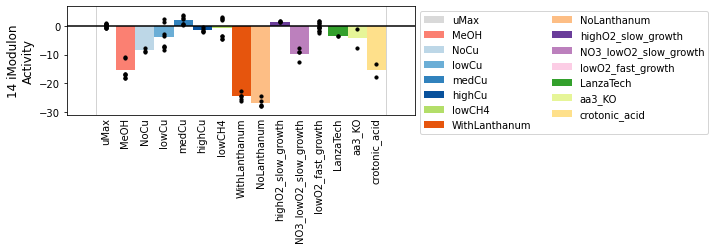

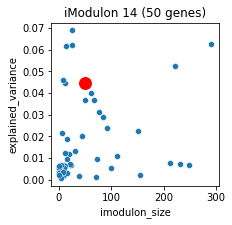

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name
19,14,NaN,1.830457e-11,4.631057e-09,0.20,0.243902,0.219780,10.0,41.0,50.0,KEGG pathways,map00910,Nitrogen metabolism,NaN
17,14,NaN,1.573774e-06,5.350830e-04,0.06,1.000000,0.113208,3.0,3.0,50.0,KEGG modules,M00438,NaN,NaN
18,14,NaN,3.069174e-05,5.217596e-03,0.06,0.500000,0.107143,3.0,6.0,50.0,KEGG modules,M00530,NaN,"Dissimilatory nitrate reduction, nitrate => am..."
21,14,NaN,6.365072e-04,5.367877e-02,0.12,0.065934,0.085106,6.0,91.0,50.0,KEGG pathways,map02010,ABC transporters,NaN
20,14,NaN,4.110500e-04,5.199782e-02,0.04,0.666667,0.075472,2.0,3.0,50.0,KEGG pathways,map00791,Atrazine degradation,NaN
19,14,NaN,8.158576e-04,9.246386e-02,0.04,0.500000,0.074074,2.0,4.0,50.0,KEGG modules,M00497,NaN,NaN
22,14,NaN,1.349446e-03,8.535245e-02,0.04,0.400000,0.072727,2.0,5.0,50.0,KEGG pathways,map05120,Epithelial cell signaling in Helicobacter pylo...,NaN


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS00940,-0.059804,NaN,193739,193970,1,hypothetical protein,X,No COG annotation,A0A4P9UIM7,2704,EQU24_RS00940,WP_017841310.1,||None,integral component of membrane,['integral component of membrane']
EQU24_RS02555,0.133846,NaN,543573,545553,1,hypothetical protein,N,Cell motility,NaN,2479,EQU24_RS02555,WP_017841004.1,||None,NaN,[]
EQU24_RS03415,0.062606,NaN,722818,723742,-1,transglutaminase family protein,E,Amino acid transport and metabolism,A0A4P9UJM0,2382,EQU24_RS03420 // EQU24_RS03415,WP_017840844.1,||None,proteolysis\npeptidase activity\nplasma membra...,['proteolysis' 'peptidase activity' 'plasma me...
EQU24_RS03420,0.076805,NaN,723738,726303,-1,circularly permuted type 2 ATP-grasp protein,S,Function unknown,A0A4P9ULX3,2382,EQU24_RS03420 // EQU24_RS03415,WP_017840843.1,||None,plasma membrane\ncell periphery\nmembrane\ncel...,['plasma membrane' 'cell periphery' 'membrane'...
EQU24_RS03425,0.097372,NaN,726715,730099,-1,transglutaminase family protein,E,Amino acid transport and metabolism,A0A4P9UJT5,2381,EQU24_RS03425,WP_017840842.1,||None,external encapsulating structure organization\...,['external encapsulating structure organizatio...
EQU24_RS03580,0.059997,NaN,767300,768908,1,SulP family inorganic anion transporter,P,Inorganic ion transport and metabolism,NaN,2359,EQU24_RS03580,WP_175421657.1,||None,sulfate transmembrane transport\nsecondary act...,['sulfate transmembrane transport'\n 'secondar...
EQU24_RS03640,0.121274,NaN,780870,782136,1,hypothetical protein,E,Amino acid transport and metabolism,A0A4P9UJQ7,2350,EQU24_RS03640,WP_017840798.1,||None,NaN,[]
EQU24_RS04700,0.088959,NaN,989861,992348,1,glycogen/starch/alpha-glucan family phosphorylase,G,Carbohydrate transport and metabolism,UPI00034CCD93,2239,EQU24_RS04700,WP_017840604.1,||None,glycogen phosphorylase activity\nlinear malto-...,['glycogen phosphorylase activity'\n 'linear m...
EQU24_RS05720,0.067366,NaN,1237807,1239430,1,SulP family inorganic anion transporter,U,"Intracellular trafficking, secretion, and vesi...",A0A4P9UMN8,2113,EQU24_RS05720,WP_017840412.1,||None,sulfate transmembrane transport\nbicarbonate t...,['sulfate transmembrane transport' 'bicarbonat...
EQU24_RS07165,0.076077,NaN,1570316,1571609,-1,ammonium transporter,P,Inorganic ion transport and metabolism,A0A4P9UQZ9,1923,EQU24_RS07165,WP_017840143.1,||None,ammonium transmembrane transporter activity\na...,['ammonium transmembrane transporter activity'...


In [55]:
imod_info(14)

In [56]:
ica_data.imodulon_table.loc[14,'category'] = 'functional'
ica_data.imodulon_table.loc[14,'function'] = 'nitrogen-related-transport_EW'


## iMod 15

iModulon 15


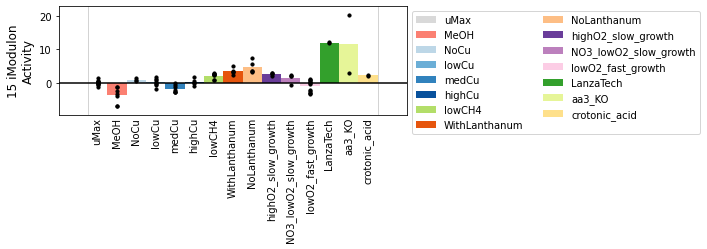

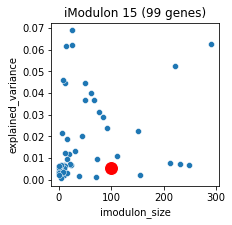

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name
111,15,transposase activity,0.000005,0.014764,0.090909,0.157895,0.115385,9.0,57.0,99.0,GO,NaN,NaN,NaN
112,15,"transposition, DNA-mediated",0.000007,0.014764,0.090909,0.152542,0.113924,9.0,59.0,99.0,GO,NaN,NaN,NaN
113,15,nitrogen fixation,0.000058,0.079286,0.050505,0.263158,0.084746,5.0,19.0,99.0,GO,NaN,NaN,NaN


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS00180,-0.041682,NaN,40588,41767,1,ISAzo13 family transposase,L,"Replication, recombination and repair",UPI00110C954A,2807,EQU24_RS00180,WP_138767046.1,||None,DNA binding,['DNA binding']
EQU24_RS00185,-0.084967,NaN,42145,42478,-1,hypothetical protein,L,"Replication, recombination and repair",A0A4P9UIJ4,2806,EQU24_RS00185,WP_017841440.1,||None,DNA binding\ntransposase activity\ntranspositi...,['DNA binding' 'transposase activity' 'transpo...
EQU24_RS00200,-0.041169,NaN,44158,44386,1,hypothetical protein,X,No COG annotation,NaN,2804,EQU24_RS00200,NaN,||,endonuclease activity\nnucleic acid phosphodie...,['endonuclease activity' 'nucleic acid phospho...
EQU24_RS00295,-0.052027,NaN,62264,62591,-1,hypothetical protein,X,No COG annotation,NaN,2788,EQU24_RS00295,NaN,||,NaN,[]
EQU24_RS01135,0.041073,NaN,231558,231840,1,hypothetical protein,X,No COG annotation,A0A4P9ULJ3,2673,EQU24_RS01140 // EQU24_RS01135 // EQU24_RS0113...,WP_017841271.1,||None,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS20980,-0.064165,NaN,4722789,4723914,-1,ISAs1 family transposase,L,"Replication, recombination and repair",A0A4P9USK5,155,EQU24_RS20980,WP_014149870.1,||None,DNA binding\ntransposase activity\ntranspositi...,['DNA binding' 'transposase activity' 'transpo...
EQU24_RS21615,0.039951,NaN,4878614,4879973,-1,hypothetical protein,X,No COG annotation,A0A4P9USM4,71,EQU24_RS21615,WP_017841574.1,||None,NaN,[]
EQU24_RS21680,-0.048317,NaN,4893012,4893216,-1,hypothetical protein,X,No COG annotation,NaN,58,EQU24_RS21680,NaN,||,nitrogen fixation\nintegral component of membr...,['nitrogen fixation' 'integral component of me...
EQU24_RS21805,0.053774,NaN,4919710,4919809,1,hypothetical protein,X,No COG annotation,NaN,44,EQU24_RS21810 // EQU24_RS21805,NaN,||,NaN,[]


In [57]:
imod_info(15)

In [58]:
ica_data.imodulon_table.loc[15,'function'] = 'tranposase/some-nif/up-in-LanzaTech_EW'


## iMod 16

iModulon 16


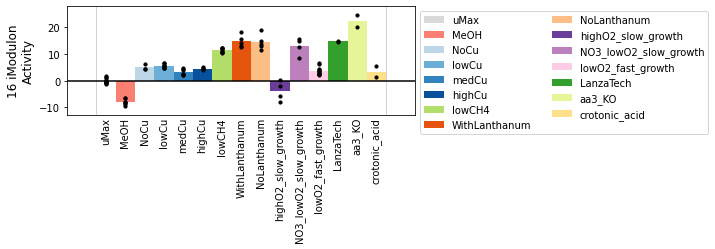

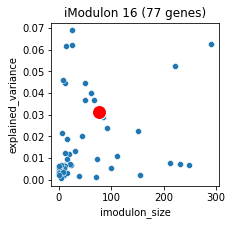

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name
23,16,NaN,0.000007,0.001786,0.090909,0.170732,0.118644,7.0,41.0,77.0,KEGG pathways,map00910,Nitrogen metabolism,NaN
21,16,NaN,0.000006,0.001971,0.038961,1.000000,0.075000,3.0,3.0,77.0,KEGG modules,M00641,NaN,"Multidrug resistance, efflux pump MexEF-OprN"
20,16,NaN,0.000023,0.001971,0.038961,0.750000,0.074074,3.0,4.0,77.0,KEGG modules,M00528,NaN,"Nitrification, ammonia => nitrite"
22,16,NaN,0.000023,0.001971,0.038961,0.750000,0.074074,3.0,4.0,77.0,KEGG modules,M00769,NaN,"Multidrug resistance, efflux pump MexPQ-OpmE"
23,16,NaN,0.000023,0.001971,0.038961,0.750000,0.074074,3.0,4.0,77.0,KEGG modules,M00804,NaN,"Complete nitrification, comammox, ammonia => n..."
28,16,NaN,0.001849,0.069834,0.038961,0.214286,0.065934,3.0,14.0,77.0,KEGG modules,M00174,NaN,"Methane oxidation, methanotroph, methane => fo..."
24,16,NaN,0.000330,0.016018,0.025974,1.000000,0.050633,2.0,2.0,77.0,KEGG modules,M00698,NaN,"Multidrug resistance, efflux pump BpeEF-OprC"
25,16,NaN,0.000330,0.016018,0.025974,1.000000,0.050633,2.0,2.0,77.0,KEGG modules,M00767,NaN,NaN
26,16,NaN,0.000330,0.016018,0.025974,1.000000,0.050633,2.0,2.0,77.0,KEGG modules,M00768,NaN,NaN
27,16,NaN,0.000978,0.041548,0.025974,0.666667,0.050000,2.0,3.0,77.0,KEGG modules,M00642,NaN,"Multidrug resistance, efflux pump MexJK-OprM"


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS00125,0.044160,NaN,29783,31106,1,autotransporter outer membrane beta-barrel dom...,S,Function unknown,UPI000A00FB62,2815,EQU24_RS00125,WP_083877750.1,||None,palmitoyl-CoA hydrolase activity\nacyl-CoA hyd...,['palmitoyl-CoA hydrolase activity' 'acyl-CoA ...
EQU24_RS00160,0.068972,NaN,36419,36716,-1,hypothetical protein,X,No COG annotation,A0A4P9UIE4,2811,EQU24_RS00160,WP_017841445.1,||None,membrane,['membrane']
EQU24_RS00590,0.063867,NaN,122491,123085,1,hypothetical protein,X,No COG annotation,A0A4P9UIF8,2751,EQU24_RS00590,WP_026130247.1,||None,integral component of membrane,['integral component of membrane']
EQU24_RS00990,0.058695,aqpZ,203431,204151,1,aquaporin Z,G,Carbohydrate transport and metabolism,NaN,2695,aqpZ,WP_235726467.1,aqpZ||aqpZ,water homeostasis\nwater transport\nregulation...,['water homeostasis' 'water transport' 'regula...
EQU24_RS01600,0.080537,NaN,335836,336223,-1,hypothetical protein,X,No COG annotation,A0A4P9UKS7,2609,EQU24_RS01600,WP_014146750.1,||None,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS19310,0.096931,pmoA,4323492,4324236,-1,methane monooxygenase/ammonia monooxygenase su...,C,Energy production and conversion,A0A4P9UU51,383,EQU24_RS19315 // EQU24_RS19310 // EQU24_RS19305,WP_017841993.1,||None,methane monooxygenase activity\nmethane monoox...,['methane monooxygenase activity' 'methane mon...
EQU24_RS19315,0.064749,pmoC,4324344,4325097,-1,methane monooxygenase/ammonia monooxygenase su...,C,Energy production and conversion,A0A4P9URM3,383,EQU24_RS19315 // EQU24_RS19310 // EQU24_RS19305,WP_017841992.1,||None,methane monooxygenase activity\nintegral compo...,['methane monooxygenase activity' 'integral co...
EQU24_RS19970,0.103401,NaN,4489396,4490098,1,transcription antitermination protein NusG,S,Function unknown,A0A4P9UV12,298,EQU24_RS19970,WP_017841866.1,||None,integral component of membrane,['integral component of membrane']
EQU24_RS20335,-0.045501,NaN,4587226,4587418,-1,hypothetical protein,X,No COG annotation,NaN,249,EQU24_RS20335,NaN,||,NaN,[]


In [59]:
imod_info(16)

In [60]:
ica_data.imodulon_table.loc[16,'function'] = 'methane-oxidation/nitrification/multi-drug-restistance_EW'


## iMod 17

iModulon 17


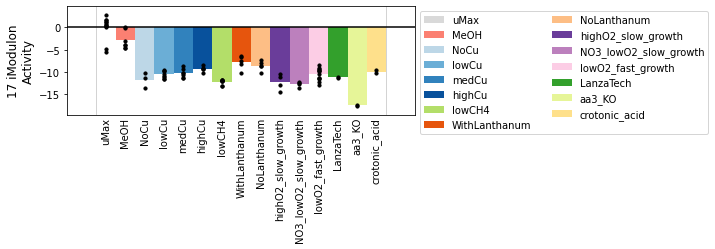

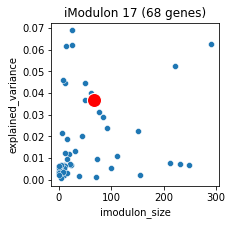

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name
114,17,SOS response,5.806188e-08,0.000238,0.102941,0.291667,0.152174,7.0,24.0,68.0,GO,NaN,NaN,NaN
29,17,NaN,1.934685e-08,0.000007,0.073529,0.714286,0.133333,5.0,7.0,68.0,KEGG modules,M00729,NaN,NaN
115,17,DNA repair,1.507697e-06,0.003093,0.117647,0.150943,0.132231,8.0,53.0,68.0,GO,NaN,NaN,NaN


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS00780,0.043733,NaN,161810,161999,1,hypothetical protein,X,No COG annotation,NaN,2724,EQU24_RS00780,NaN,||,integral component of membrane\nmembrane,['integral component of membrane' 'membrane']
EQU24_RS01130,0.060991,NaN,230606,231530,1,ATP-binding protein,U,"Intracellular trafficking, secretion, and vesi...",UPI000344DE75,2673,EQU24_RS01140 // EQU24_RS01135 // EQU24_RS0113...,WP_017841272.1,||None,ATP binding\nintegral component of membrane\nc...,['ATP binding' 'integral component of membrane...
EQU24_RS01170,0.058433,NaN,235812,237102,-1,Y-family DNA polymerase,L,"Replication, recombination and repair",A0A4P9UIZ1,2668,umuD // EQU24_RS01170,WP_017841266.1,||None,ATP hydrolysis activity\nATP hydrolysis activi...,['ATP hydrolysis activity' 'ATP hydrolysis act...
EQU24_RS01175,0.166001,umuD,237101,237485,-1,translesion error-prone DNA polymerase V autop...,K,Transcription,UPI00191C1247,2668,umuD // EQU24_RS01170,WP_201764864.1,umuD||umuD,"regulation of transcription, DNA-templated\nDN...","['regulation of transcription, DNA-templated' ..."
EQU24_RS01340,0.081903,NaN,280094,280748,1,hypothetical protein,S,Function unknown,A0A4V1IJD7,2649,EQU24_RS01340,WP_017841229.1,||None,hydrolase activity,['hydrolase activity']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS20935,0.048928,NaN,4712832,4713129,1,type II toxin-antitoxin system PemK/MazF famil...,T,Signal transduction mechanisms,A0A4P9UVF2,163,EQU24_RS20935 // EQU24_RS20930,WP_017841689.1,||None,DNA binding,['DNA binding']
EQU24_RS20950,0.079183,NaN,4717305,4718589,-1,ISKra4 family transposase,L,"Replication, recombination and repair",A0A4V1IKC4,161,EQU24_RS20950,WP_017841684.1,||None,NaN,[]
EQU24_RS21765,0.045797,NaN,4907793,4909071,1,aspartate aminotransferase family protein,E,Amino acid transport and metabolism,A0A4P9USP8,47,EQU24_RS21770 // EQU24_RS21765,WP_017841548.1,||None,ectoine biosynthetic process\ndiaminobutyrate-...,['ectoine biosynthetic process'\n 'diaminobuty...
EQU24_RS21860,0.046846,NaN,4931084,4931348,1,type II toxin-antitoxin system HicA family toxin,S,Function unknown,A0A4P9UXL9,39,EQU24_RS21870 // EQU24_RS21865 // EQU24_RS21860,WP_017841530.1,||None,mRNA binding,['mRNA binding']


In [61]:
imod_info(17)

In [62]:
ica_data.imodulon_table.loc[17,'function'] = 'SOS-response_EW'


## iMod 18

iModulon 18


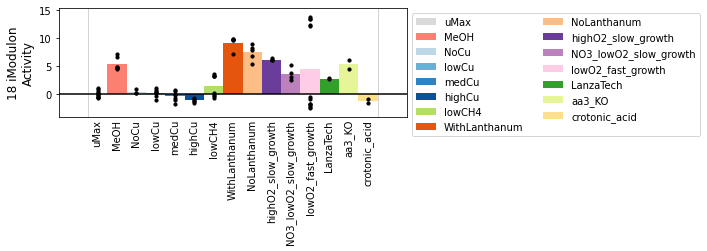

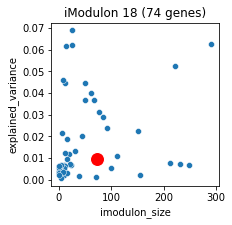

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS00470,-0.049488,NaN,97499,98117,-1,GDSL family lipase,E,Amino acid transport and metabolism,A0A4P9UK91,2768,EQU24_RS00470,WP_017841393.1,||None,NaN,[]
EQU24_RS00940,-0.091433,NaN,193739,193970,1,hypothetical protein,X,No COG annotation,A0A4P9UIM7,2704,EQU24_RS00940,WP_017841310.1,||None,integral component of membrane,['integral component of membrane']
EQU24_RS01475,0.051914,NaN,308160,308637,-1,formate dehydrogenase subunit gamma,C,Energy production and conversion,A0A4P9UJ36,2629,EQU24_RS01475 // EQU24_RS01470 // EQU24_RS0146...,WP_017841204.1,||None,"metal ion binding\n2 iron, 2 sulfur cluster bi...","['metal ion binding' '2 iron, 2 sulfur cluster..."
EQU24_RS01635,0.080004,NaN,344368,345238,1,EAL domain-containing protein,T,Signal transduction mechanisms,A0A4P9UJC3,2604,EQU24_RS01640 // EQU24_RS01635,WP_017841179.1,||None,cellular response to DNA damage stimulus\ncell...,['cellular response to DNA damage stimulus' 'c...
EQU24_RS01640,0.069244,NaN,345234,345870,1,alpha/beta hydrolase,S,Function unknown,A0A4P9UJ64,2604,EQU24_RS01640 // EQU24_RS01635,WP_017841178.1,||None,hydrolase activity,['hydrolase activity']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS20860,0.092332,NaN,4701216,4704489,1,ribonucleotide reductase,F,Nucleotide transport and metabolism,A0A4P9UX63,173,EQU24_RS20860,WP_017841702.1,||None,intein-mediated protein splicing\nribonucleosi...,['intein-mediated protein splicing'\n 'ribonuc...
EQU24_RS20865,0.065182,NaN,4704581,4704830,1,DUF2442 domain-containing protein,S,Function unknown,A0A4P9USI7,172,EQU24_RS20865,WP_017841701.1,||None,NaN,[]
EQU24_RS20870,0.044096,NaN,4704985,4705669,1,NrdJb,F,Nucleotide transport and metabolism,A0A4P9USB1,171,EQU24_RS20870,WP_017841700.1,||None,cell wall\nplasma membrane\ncell periphery\nex...,['cell wall' 'plasma membrane' 'cell periphery...
EQU24_RS21100,0.057086,NaN,4752022,4753195,-1,AMP-binding protein,X,No COG annotation,A0A4P9USE2,140,pyp // EQU24_RS21100,WP_017841658.1,||None,ligase activity,['ligase activity']


In [63]:
imod_info(18)

In [64]:
ica_data.imodulon_table.loc[18,'function'] = 'metal-ion-binding/lowO2-fast-growth-split_EW'


## iMod 19

iModulon 19


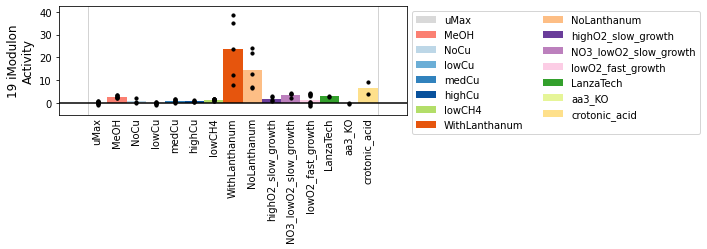

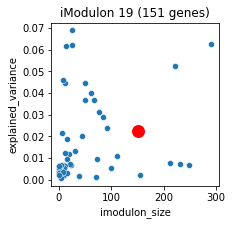

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name
31,19,NaN,0.000430,0.073089,0.026490,0.363636,0.049383,4.0,11.0,151.0,KEGG modules,M00742,NaN,NaN
32,19,NaN,0.000881,0.099800,0.026490,0.307692,0.048780,4.0,13.0,151.0,KEGG modules,M00258,NaN,NaN
30,19,NaN,0.000045,0.015356,0.019868,1.000000,0.038961,3.0,3.0,151.0,KEGG modules,M00087,NaN,beta-Oxidation


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS00090,0.039406,thyA,22412,23246,1,thymidylate synthase,F,Nucleotide transport and metabolism,A0A4P9UL39,2820,thyA // EQU24_RS00085,WP_017841458.1,thyA||thyA,pyrimidine deoxyribonucleoside monophosphate c...,['pyrimidine deoxyribonucleoside monophosphate...
EQU24_RS00095,0.065469,NaN,23251,23782,-1,hypothetical protein,X,No COG annotation,A0A4P9UI81,2819,EQU24_RS00095,WP_017841457.1,||None,hydrolase activity,['hydrolase activity']
EQU24_RS00160,0.041920,NaN,36419,36716,-1,hypothetical protein,X,No COG annotation,A0A4P9UIE4,2811,EQU24_RS00160,WP_017841445.1,||None,membrane,['membrane']
EQU24_RS00455,0.039042,tatA,96158,96371,1,twin-arginine translocase TatA/TatE family sub...,U,"Intracellular trafficking, secretion, and vesi...",A0A4P9UIV2,2769,tatC // tatB // tatA,WP_017841396.1,tatA||tatA,amide transport\npeptide transport\npeptide se...,['amide transport' 'peptide transport' 'peptid...
EQU24_RS00625,0.039606,NaN,129668,131204,1,NaN,X,No COG annotation,NaN,2744,EQU24_RS00625,NaN,||,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS22065,0.046063,NaN,4983178,4984960,-1,VWA domain-containing protein,S,Function unknown,NaN,9,EQU24_RS22085 // EQU24_RS22080 // EQU24_RS2207...,WP_017841489.1,||None,integral component of membrane\nprotein binding,['integral component of membrane' 'protein bin...
EQU24_RS22070,0.045171,NaN,4984959,4985940,-1,VWA domain-containing protein,S,Function unknown,A0A4P9UVF8,9,EQU24_RS22085 // EQU24_RS22080 // EQU24_RS2207...,WP_017841488.1,||None,integral component of membrane,['integral component of membrane']
EQU24_RS22075,0.056155,NaN,4985936,4986413,-1,DUF4381 domain-containing protein,S,Function unknown,A0A4P9USW0,9,EQU24_RS22085 // EQU24_RS22080 // EQU24_RS2207...,WP_017841487.1,||None,integral component of membrane,['integral component of membrane']
EQU24_RS22080,0.046180,NaN,4986412,4987321,-1,DUF58 domain-containing protein,S,Function unknown,A0A4V1IKE5,9,EQU24_RS22085 // EQU24_RS22080 // EQU24_RS2207...,WP_017841486.1,||None,NaN,[]


In [65]:
imod_info(19)

In [66]:
ica_data.imodulon_table.loc[19,'function'] = 'fatty-acid-beta-oxidation/membrane?_EW'


## iMod 20

iModulon 20


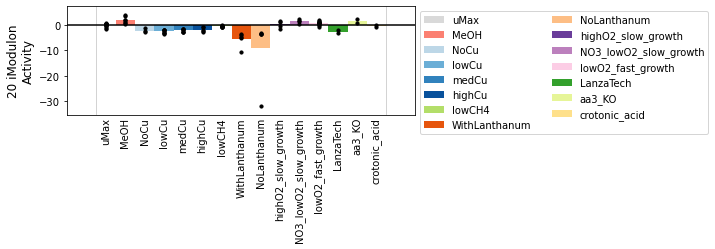

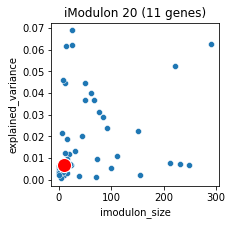

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS00185,0.177116,NaN,42145,42478,-1,hypothetical protein,L,"Replication, recombination and repair",A0A4P9UIJ4,2806,EQU24_RS00185,WP_017841440.1,||None,DNA binding\ntransposase activity\ntranspositi...,['DNA binding' 'transposase activity' 'transpo...
EQU24_RS01150,0.164147,NaN,234038,234461,1,hypothetical protein,X,No COG annotation,A0A4P9UIU6,2671,EQU24_RS01150,WP_017841268.1,||None,NaN,[]
EQU24_RS01765,0.211193,NaN,371879,372134,-1,DUF504 domain-containing protein,A,RNA processing and modification,A0A4P9ULU4,2590,EQU24_RS01765,WP_017841154.1,||None,NaN,[]
EQU24_RS05320,0.205633,cobS,1131915,1132662,-1,adenosylcobinamide-GDP ribazoletransferase,H,Coenzyme transport and metabolism,A0A4P9UMQ7,2166,cobS // cobC // EQU24_RS05310 // EQU24_RS05305,WP_017840486.1,cobS||cobS,cobalamin biosynthetic process\ncobalamin 5'-p...,"['cobalamin biosynthetic process'\n ""cobalamin..."
EQU24_RS06205,0.103195,NaN,1352804,1353026,-1,hypothetical protein,X,No COG annotation,NaN,2050,EQU24_RS06205,NaN,||,phosphorelay signal transduction system\ninteg...,['phosphorelay signal transduction system'\n '...
EQU24_RS08455,0.203140,urtB,1866865,1867792,1,urea ABC transporter permease subunit UrtB,E,Amino acid transport and metabolism,A0A4V1IJQ9,1762,EQU24_RS08475 // urtE // urtD // urtC // urtB,WP_017839901.1,urtB||urtB,plasma membrane\nintegral component of membran...,['plasma membrane' 'integral component of memb...
EQU24_RS08830,0.111397,NaN,1958454,1959186,-1,transposase,L,"Replication, recombination and repair",UPI00158623C4,1713,EQU24_RS08830,WP_175421673.1,||None,DNA binding\ntransposase activity\ntranspositi...,['DNA binding' 'transposase activity' 'transpo...
EQU24_RS11970,0.185784,NaN,2677956,2678349,-1,hypothetical protein,Q,"Secondary metabolites biosynthesis, transport,...",A0A4P9URC2,1322,EQU24_RS11970 // EQU24_RS11965,WP_051056233.1,||None,"hydrolase activity, acting on ester bonds\npho...","['hydrolase activity, acting on ester bonds' '..."
EQU24_RS14755,0.161133,NaN,3300040,3300526,-1,hemerythrin domain-containing protein,S,Function unknown,A0A4P9UPL3,966,EQU24_RS14755,WP_017838763.1,||None,NaN,[]
EQU24_RS15150,0.092793,NaN,3384817,3385819,1,hypothetical protein,X,No COG annotation,A0A4P9UPS4,916,EQU24_RS15150,WP_017838693.1,||None,integral component of membrane,['integral component of membrane']


In [67]:
imod_info(20)

In [68]:
ica_data.imodulon_table.loc[20,'function'] = 'unclear/outlier-response-vial-woLa_EW'


## iMod 21

iModulon 21


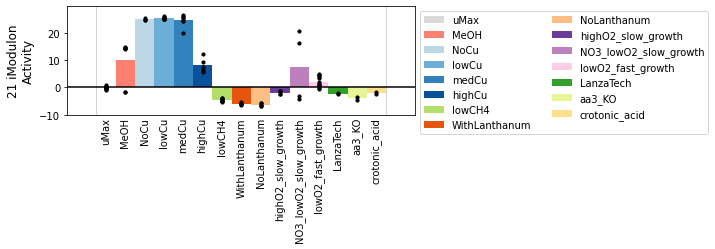

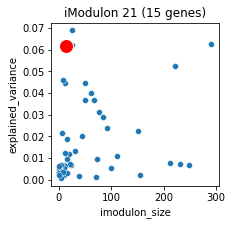

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name
33,21,NaN,0.000047,0.015896,0.2,0.142857,0.166667,3.0,21.0,15.0,KEGG modules,M00331,NaN,NaN
25,21,NaN,0.000574,0.086839,0.2,0.062500,0.095238,3.0,48.0,15.0,KEGG pathways,map05111,Biofilm formation - Vibrio cholerae,NaN
24,21,NaN,0.000686,0.086839,0.2,0.058824,0.090909,3.0,51.0,15.0,KEGG pathways,map03070,Bacterial secretion system,NaN


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS00940,0.172611,NaN,193739,193970,1,hypothetical protein,X,No COG annotation,A0A4P9UIM7,2704,EQU24_RS00940,WP_017841310.1,||None,integral component of membrane,['integral component of membrane']
EQU24_RS07675,0.159194,NaN,1687716,1689852,-1,conjugation transfer protein,C,Energy production and conversion,NaN,1863,EQU24_RS07675,NaN,||,heme binding\nelectron transport chain\nmetal ...,['heme binding' 'electron transport chain' 'me...
EQU24_RS07680,0.172562,NaN,1690300,1691008,-1,hypothetical protein,X,No COG annotation,A0A4P9UR71,1862,EQU24_RS07680,WP_017840047.1,||corA,metal ion binding,['metal ion binding']
EQU24_RS19470,0.156530,NaN,4363642,4366327,-1,S8 family serine peptidase,Q,"Secondary metabolites biosynthesis, transport,...",UPI001586656B,363,EQU24_RS19470 // EQU24_RS19465,WP_175421707.1,||None,polysaccharide catabolic process\nserine-type ...,['polysaccharide catabolic process' 'serine-ty...
EQU24_RS19475,0.176029,NaN,4366809,4368060,-1,hypothetical protein,X,No COG annotation,UPI00110D1B61,362,EQU24_RS19480 // EQU24_RS19475,WP_138767233.1,||None,aspartic-type endopeptidase activity\nproteolysis,['aspartic-type endopeptidase activity' 'prote...
EQU24_RS19480,0.190035,NaN,4368064,4370446,-1,DUF3438 family protein,N,Cell motility,A0A4P9UU80,362,EQU24_RS19480 // EQU24_RS19475,WP_017841958.1,||None,protein secretion,['protein secretion']
EQU24_RS19485,0.207103,NaN,4371273,4371714,-1,hypothetical protein,X,No COG annotation,A0A4P9URP9,361,EQU24_RS19490 // EQU24_RS19485,WP_017841955.1,||None,NaN,[]
EQU24_RS19490,0.200073,NaN,4371734,4372952,-1,type II secretion system F family protein,U,"Intracellular trafficking, secretion, and vesi...",A0A4V1IKA0,361,EQU24_RS19490 // EQU24_RS19485,WP_017841954.1,||None,integral component of membrane,['integral component of membrane']
EQU24_RS19495,0.206576,NaN,4373252,4375061,-1,hypothetical protein,N,Cell motility,A0A4P9UWM5,360,EQU24_RS19495,WP_017841953.1,||tadA,cyclic-di-GMP binding,['cyclic-di-GMP binding']
EQU24_RS19500,0.229408,NaN,4376070,4376724,-1,hypothetical protein,X,No COG annotation,A0A4P9URX9,359,EQU24_RS19505 // EQU24_RS19500,WP_017841951.1,||None,integral component of membrane,['integral component of membrane']


In [69]:
imod_info(21)

In [72]:
ica_data.imodulon_table.loc[21,'category'] = 'functional'
ica_data.imodulon_table.loc[21,'function'] = 'cu-repression/alexey-gene-cluster_EW'


## iMod 22

iModulon 22


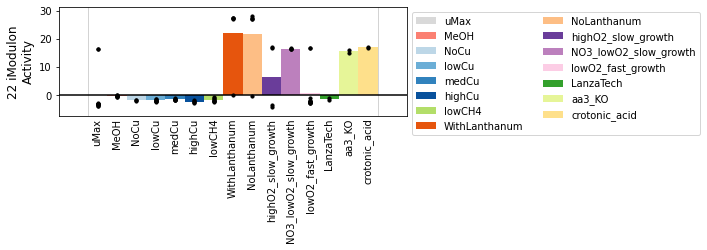

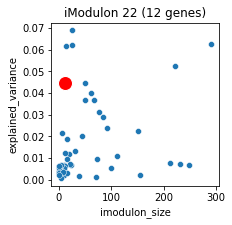

,imodulon,go_name,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,annotation,pathway_name,module_name
116,22,transposase activity,4.272795e-11,1.128696e-07,0.583333,0.122807,0.202899,7.0,57.0,12.0,GO,NaN,NaN,NaN
117,22,"transposition, DNA-mediated",5.501810e-11,1.128696e-07,0.583333,0.118644,0.197183,7.0,59.0,12.0,GO,NaN,NaN,NaN
118,22,DNA binding,1.513982e-08,2.070623e-05,0.750000,0.027778,0.053571,9.0,324.0,12.0,GO,NaN,NaN,NaN


,gene_weight,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra,specific_gos_n,specific_gos
EQU24_RS04160,0.132124,NaN,874502,874683,-1,NaN,X,No COG annotation,NaN,2308,EQU24_RS04170 // EQU24_RS04165 // ssrS // EQU2...,NaN,||,NaN,[]
EQU24_RS05675,0.170727,NaN,1225286,1226585,1,transposase,L,"Replication, recombination and repair",UPI00110CA81F,2119,EQU24_RS05675,WP_138767097.1,||None,DNA binding\ntransposase activity\ntranspositi...,['DNA binding' 'transposase activity' 'transpo...
EQU24_RS06200,0.249700,NaN,1352012,1352726,-1,transposase,L,"Replication, recombination and repair",NaN,2051,EQU24_RS06200,WP_138767106.1,||None,DNA binding\ntransposase activity\ntranspositi...,['DNA binding' 'transposase activity' 'transpo...
EQU24_RS06885,0.176220,NaN,1513567,1514488,-1,Rpn family recombination-promoting nuclease/pu...,S,Function unknown,A0A4P9UQW1,1956,EQU24_RS06885,WP_014149136.1,||None,NaN,[]
EQU24_RS09050,0.126247,NaN,2000662,2002213,1,IS66 family transposase,L,"Replication, recombination and repair",NaN,1685,EQU24_RS09050,WP_040575330.1,||None,NaN,[]
EQU24_RS12805,0.123052,NaN,2872306,2873593,1,IS4 family transposase,L,"Replication, recombination and repair",NaN,1225,EQU24_RS12805,WP_244310887.1,||None,DNA binding\ntransposase activity\ntranspositi...,['DNA binding' 'transposase activity' 'transpo...
EQU24_RS14960,0.285722,NaN,3336399,3337698,-1,transposase,L,"Replication, recombination and repair",UPI00110CA81F,942,EQU24_RS14960,WP_138767097.1,||None,DNA binding\ntransposase activity\ntranspositi...,['DNA binding' 'transposase activity' 'transpo...
EQU24_RS16040,0.151802,NaN,3603377,3604664,-1,ISNCY family transposase,L,"Replication, recombination and repair",UPI001AD9057B,798,EQU24_RS16040,WP_209005074.1,||None,DNA binding\ntransposase activity\ntranspositi...,['DNA binding' 'transposase activity' 'transpo...
EQU24_RS17670,0.261631,NaN,3940109,3941288,1,ISAzo13 family transposase,L,"Replication, recombination and repair",UPI00110D0AC0,594,EQU24_RS17670,WP_138767139.1,||None,DNA binding,['DNA binding']
EQU24_RS18390,0.199074,NaN,4104697,4105996,1,transposase,L,"Replication, recombination and repair",UPI00110CA81F,506,EQU24_RS18390,WP_138767097.1,||None,DNA binding\ntransposase activity\ntranspositi...,['DNA binding' 'transposase activity' 'transpo...


In [71]:
imod_info(22)

In [73]:
ica_data.imodulon_table.loc[22,'function'] = 'transposase_EW'


### iModulon 6: ybc Operon
This iModulon contains four genes starting with ybc, and ndhF, which are all likely in the same operon. Little is known about the genes except that they are part of prophage 1.

In [17]:
ica_data.view_imodulon(6)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_01830,0.272368,ndhF,AL009126.3,BSU01830,205409,206926,+,putative NADH dehydrogenase%3B prophage 1 region,Energy production and conversion,P39755,Op137,NaN
BSU_01845,0.265787,ybcC,AL009126.3,BSU01845,206941,209556,+,conserved transmembrane protein coupled to NAD...,Function unknown,O34688,Op138,NaN
BSU_01860,0.254484,ybcF,AL009126.3,BSU01860,209633,210160,+,putative enzyme%3B prophage 1 region,Inorganic ion transport and metabolism,O34823,Op139,NaN
BSU_01870,0.260051,ybcH,AL009126.3,BSU01870,210224,210514,+,conserved protein of unknown function%3B proph...,No COG annotation,O34795,Op140,NaN
BSU_01880,0.199487,ybcI,AL009126.3,BSU01880,210572,210946,+,conserved hypothetical protein%3B prophage 1 r...,Function unknown,O34380,Op141,NaN


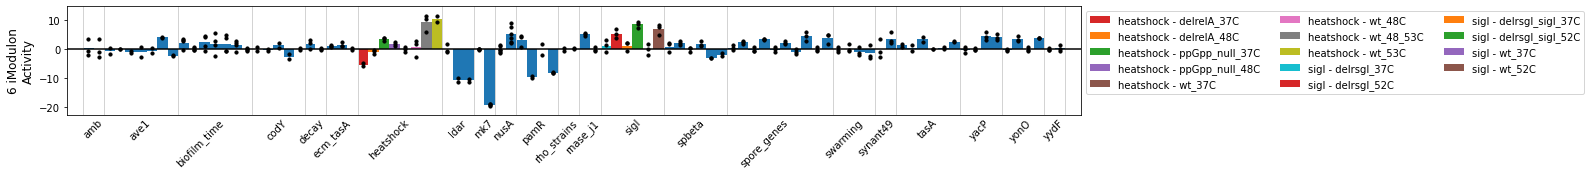

In [18]:
plot_activities(ica_data,6,highlight=['heatshock','sigI'])

In [19]:
DF_enrichments[DF_enrichments.imodulon=='6'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value


In [20]:
# Update the ICA data object

ica_data.rename_imodulons({6:'ybc-operon'})
ica_data.imodulon_table.loc['ybc-operon','category'] = 'functional'

### iModulon 7: Putative yvaF
We predict that this iModulon is regulated by yvaF, a putative transcriptional regulator that is in the iModulon.

In [21]:
ica_data.view_imodulon(7)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_33540,0.125035,azoRB,AL009126.3,BSU33540,3445442,3446077,-,NADH:dichloroindophenol oxidoreductase (2-meth...,Lipid transport and metabolism,O32224,Op2636,"SigA,SigG,MhqR"
BSU_33550,0.230015,yvaC,AL009126.3,BSU33550,3446237,3448132,-,putative integral inner membrane protein,Function unknown,O32225,Op2637,NaN
BSU_33560,0.349249,yvaD,AL009126.3,BSU33560,3448295,3448696,-,putative integral inner membrane protein,Function unknown,O32226,Op2638,NaN
BSU_33570,0.357373,yvaE,AL009126.3,BSU33570,3448693,3449052,-,putative metabolite-efflux transporter,Inorganic ion transport and metabolism,O32227,Op2639,NaN
BSU_33580,0.343573,yvaF,AL009126.3,BSU33580,3449049,3449621,-,putative transcriptional regulator,Transcription,O32228,Op2640,NaN


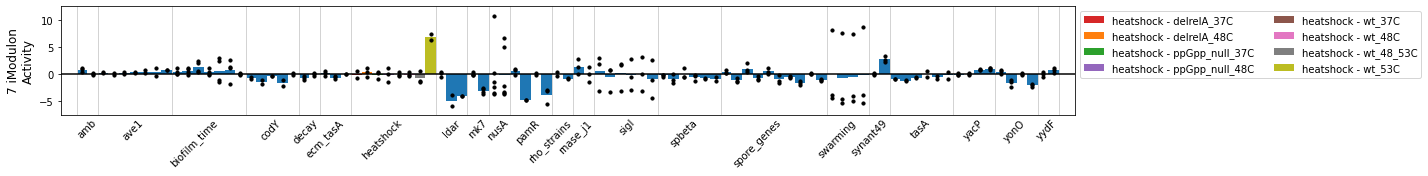

In [22]:
plot_activities(ica_data,7,highlight=['heatshock'])

In [23]:
DF_enrichments[DF_enrichments.imodulon=='7'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value


In [24]:
# Update the ica_data object
ica_data.rename_imodulons({7:'YvaF'})
ica_data.imodulon_table.loc['YvaF','category'] = 'functional'

### iModulon 9: Unknown
Another technical artifact from the MK7 project

In [25]:
ica_data.view_imodulon(9)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_00240,-0.041348,csfB,AL009126.3,BSU00240,35531,35725,+,forespore-specific anti-sigma factor,Function unknown,P37534,Op17,"SigK,SigF"
BSU_01620,0.045969,feuB,AL009126.3,BSU01620,181347,182351,-,ferri-bacillibactin permease,Inorganic ion transport and metabolism,P40410,Op121,"SigA,Btr,Fur"
BSU_01790,-0.099195,ybbU,AL009126.3,BSU01790,202126,202266,+,hypothetical protein,No COG annotation,A0A2K4Z9G0,Op134,NaN
BSU_02180,-0.086825,ybfEc,AL009126.3,NaN,238164,238448,-,conserved protein of unknown function (C-termi...,No COG annotation,NaN,Op163,NaN
BSU_02785,-0.033619,BSU_02785,AL009126.3,BSU02785,300525,300656,-,hypothetical protein,No COG annotation,A0A2K4Z9F5,Op212,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
BSU_40529,0.046294,yyzH,AL009126.3,BSU40529,4166815,4166964,-,hypothetical protein,No COG annotation,C0H3U2,Op3106,SigB
BSU_40578,0.105474,yyzK,AL009126.3,NaN,4172259,4172405,-,hypothetical protein,No COG annotation,NaN,Op3115,NaN
BSU_40579,0.121683,yyzL,AL009126.3,NaN,4172387,4172536,-,hypothetical protein,No COG annotation,NaN,Op3116,NaN
BSU_40640,-0.039631,yybH,AL009126.3,BSU40640,4177756,4178145,-,conserved hypothetical protein,Function unknown,P37496,Op3118,NaN


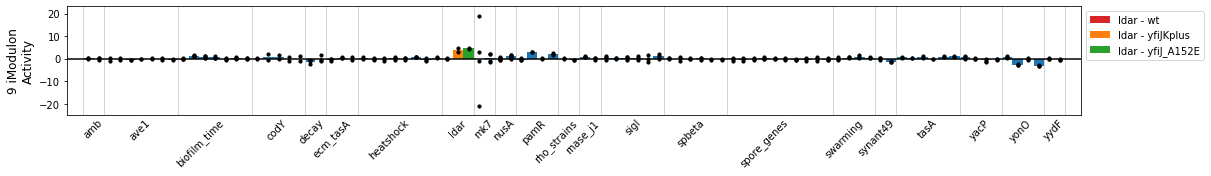

In [26]:
plot_activities(ica_data,9,highlight=['ldar'])

In [27]:
DF_enrichments[DF_enrichments.imodulon=='9'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value
36,9,NaN,1.455111e-07,0.000042,0.070588,0.255319,0.110599,12.0,47.0,170.0,NaN,NaN,NaN,NaN,pseudogenes
37,9,NaN,1.078468e-04,0.013181,0.152941,0.085526,0.109705,26.0,304.0,170.0,NaN,NaN,NaN,NaN,Prophages and mobile genetic elements
38,9,NaN,1.382586e-04,0.013181,0.147059,0.085911,0.108460,25.0,291.0,170.0,NaN,NaN,NaN,NaN,prophages
39,9,NaN,5.876380e-04,0.042016,0.305882,0.059908,0.100193,52.0,868.0,170.0,NaN,NaN,NaN,NaN,proteins of unknown function


In [28]:
# Update the ica_data object
ica_data.rename_imodulons({9:'uncharacterized-3'})

### iModulon 51: Unknown

In [29]:
ica_data.view_imodulon(51)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_04530,0.076764,fbpB,AL009126.3,BSU04530,506322,506501,-,regulator of iron homeostasis,Function unknown,P96609,Op338,Fur
BSU_04990,0.079265,yddJ,AL009126.3,BSU04990,545595,545975,+,ICEBs1 mobile element: putative lipoprotein of...,Function unknown,P96647,Op377,"ImmR,AbrB"
BSU_25565,0.071803,BSU_25565,AL009126.3,BSU25565,2637179,2637328,-,hypothetical protein,No COG annotation,A0A2K4Z9K3,Op2018,NaN
BSU_27600,0.155245,rsh,AL009126.3,BSU27600,2820529,2822733,-,GTP pyrophosphokinase (RelA/SpoT),Transcription,O54408,Op2206,NaN


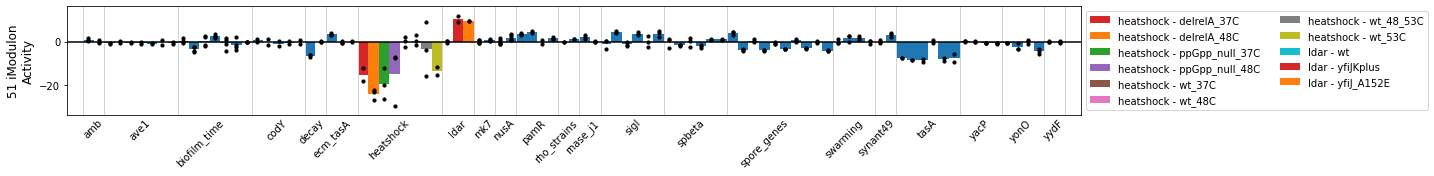

In [30]:
plot_activities(ica_data,51,highlight=['heatshock','ldar'])

In [31]:
DF_enrichments[DF_enrichments.imodulon=='51'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value


In [32]:
# Update the ica_data object
ica_data.rename_imodulons({51:'uncharacterized-4'})

### iModulon 52: ykzB-related
This iModulon is only down-regulated during sporulation when ykzB is deleted.

In [33]:
ica_data.view_imodulon(52)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_18130,0.095418,eglS,AL009126.3,BSU18130,1940625,1942124,+,endo-1%2C4-beta-glucanase,Carbohydrate transport and metabolism,P10475,Op1382,SigA
BSU_18140,0.156711,ynfE,AL009126.3,BSU18140,1942192,1942455,+,conserved hypothetical protein,No COG annotation,Q45069,Op1383,NaN
BSU_18150,0.083893,xynC,AL009126.3,BSU18150,1942714,1943982,-,secreted endo-xylanase,Cell wall/membrane/envelope biogenesis,Q45070,Op1384,AbrB
BSU_18160,0.082117,xynD,AL009126.3,BSU18160,1944113,1945654,-,arabinoxylan arabinofuranohydrolase,Carbohydrate transport and metabolism,Q45071,Op1385,AbrB
BSU_18190,0.083229,yngC,AL009126.3,BSU18190,1947668,1948264,+,putative integral inner membrane protein%2C ph...,Function unknown,O31823,Op1388,"SigM,YclJ"
BSU_18200,0.145381,nrnB,AL009126.3,BSU18200,1948313,1949512,-,oligoribonuclease (nanoRNase),Function unknown,O31824,Op1389,NaN
BSU_18210,0.208872,ldeE,AL009126.3,BSU18210,1949682,1951217,-,methylcrotonoyl-CoA carboxylase subunit (leuci...,Lipid transport and metabolism,O31825,Op1390,SigE
BSU_18220,0.227312,ldeF,AL009126.3,BSU18220,1951228,1952010,-,methylglutaconyl-CoA hydratase (leucine degrad...,Lipid transport and metabolism,O34893,Op1390,SigE
BSU_18230,0.223275,ldeG,AL009126.3,BSU18230,1952031,1952930,-,hydroxymethylglutaryl-CoA lyase (leucine degra...,Amino acid transport and metabolism,O34873,Op1390,SigE
BSU_18239,0.237199,lgeHB,AL009126.3,BSU18239,1952945,1953166,-,methylcrotonyl-CoA carboxylase%3B biotinylated...,Lipid transport and metabolism,C0H419,Op1390,SigE


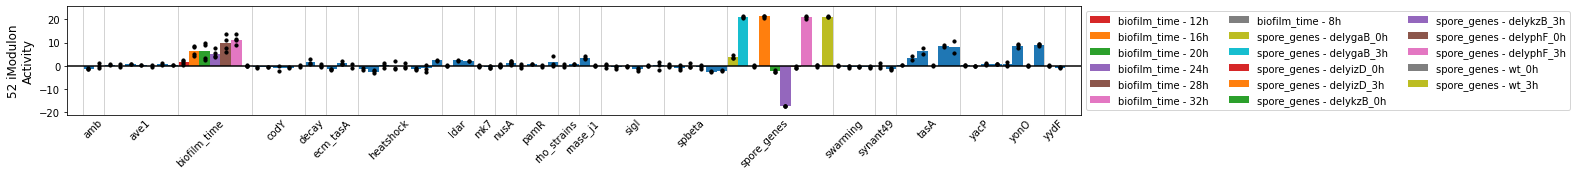

In [34]:
plot_activities(ica_data,52,highlight=['biofilm_time','spore_genes'])

In [35]:
DF_enrichments[DF_enrichments.imodulon=='52'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value
273,52,NaN,3.396203e-13,9.713141e-11,0.4375,0.318182,0.368421,7.0,22.0,16.0,NaN,NaN,NaN,NaN,utilization of branched-chain amino acids
73,52,NaN,4.550649e-04,9.310647e-02,0.1250,0.222222,0.160000,2.0,9.0,16.0,NaN,M00082,NaN,"Fatty acid biosynthesis, initiation",NaN
274,52,NaN,3.585559e-09,5.127349e-07,0.4375,0.093333,0.153846,7.0,75.0,16.0,NaN,NaN,NaN,NaN,utilization of amino acids
74,52,NaN,6.922414e-04,9.310647e-02,0.1250,0.181818,0.148148,2.0,11.0,16.0,NaN,M00376,NaN,3-Hydroxypropionate bi-cycle,NaN
279,52,NaN,9.095451e-05,3.716141e-03,0.1875,0.120000,0.146341,3.0,25.0,16.0,NaN,NaN,NaN,NaN,utilization of other polymeric carbohydrates
95,52,NaN,1.587503e-04,3.571881e-02,0.1875,0.100000,0.130435,3.0,30.0,16.0,NaN,map01212,Fatty acid metabolism,NaN,NaN
277,52,NaN,1.607265e-05,9.193555e-04,0.4375,0.027559,0.051852,7.0,279.0,16.0,NaN,NaN,NaN,NaN,amino acid/ nitrogen metabolism
278,52,NaN,4.191706e-05,1.998047e-03,0.4375,0.023810,0.045161,7.0,294.0,16.0,NaN,NaN,NaN,NaN,sporulation proteins/ other
275,52,NaN,9.165722e-07,8.737989e-05,0.6250,0.021277,0.041152,10.0,470.0,16.0,NaN,NaN,NaN,NaN,sporulation proteins
276,52,NaN,4.970116e-06,3.553633e-04,0.6250,0.017762,0.034542,10.0,568.0,16.0,NaN,NaN,NaN,NaN,sporulation


In [36]:
# Update the ica_data object
ica_data.rename_imodulons({52:'ykzB-related'})
ica_data.imodulon_table.loc['ykzB-related','category'] = 'functional'

### iModulon 61: early biofilm

In [37]:
ica_data.view_imodulon(61)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_03359,0.070463,yczL,AL009126.3,BSU03359,365850,366035,+,hypothetical protein,No COG annotation,C0H3U7,Op251,"SigA,Zur"
BSU_07560,0.060866,pelA,AL009126.3,BSU07560,827993,829255,+,pectate lyase,Carbohydrate transport and metabolism,P39116,Op602,"ComA,TnrA,CcpA"
BSU_08230,0.084936,catD,AL009126.3,BSU08230,897588,897992,+,catechol-2%2C3-dioxygenase membrane subunit,Function unknown,P54720,Op640,"SigA,CatR,YodB,Fur"
BSU_08240,0.082969,catE,AL009126.3,BSU08240,898010,898867,+,catechol-2%2C3-dioxygenase subunit,Function unknown,P54721,Op640,"SigA,CatR,YodB,Fur"
BSU_10300,0.060752,aprE,AL009126.3,BSU10300,1104423,1105568,-,serine alkaline protease (Ca(2+)-dependent sub...,"Post-translational modification, protein turno...",P04189,Op807,"SigA,SinR,CodY,DegU,AbrB,ScoC"
BSU_11040,0.109451,yitM,AL009126.3,BSU11040,1182448,1183032,-,conserved hypothetical protein,No COG annotation,O06748,Op864,NaN
BSU_11055,0.074836,yitO,AL009126.3,BSU11055,1183029,1183958,-,putative integral inner membrane protein with ...,No COG annotation,O06750,Op864,NaN
BSU_11070,0.066387,yitP,AL009126.3,BSU11070,1183943,1184479,-,conserved hypothetical protein,Function unknown,O06751,Op864,NaN
BSU_12200,0.081363,yjiA,AL009126.3,BSU12200,1290675,1290953,-,hypothetical protein,No COG annotation,O34679,Op955,NaN
BSU_13190,0.081301,ispA,AL009126.3,BSU13190,1386024,1386983,-,intracellular serine protease,"Post-translational modification, protein turno...",P11018,Op1028,"SigA,CodY"


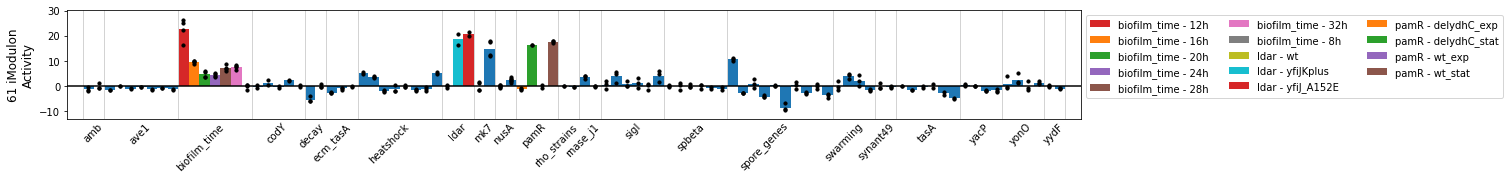

In [38]:
plot_activities(ica_data,61,highlight=['biofilm_time','ldar','pamR'])

In [39]:
DF_enrichments[DF_enrichments.imodulon=='61'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value
341,61,NaN,1.539137e-10,4.401931e-08,0.142857,0.833333,0.243902,5.0,6.0,35.0,NaN,NaN,NaN,NaN,capsule biosynthesis and degradation
342,61,NaN,3.134567e-06,4.482431e-04,0.171429,0.113208,0.136364,6.0,105.0,35.0,NaN,NaN,NaN,NaN,biosynthesis of antibacterial compounds
343,61,NaN,3.508377e-05,3.344653e-03,0.171429,0.075000,0.104348,6.0,80.0,35.0,NaN,NaN,NaN,NaN,miscellaneous metabolic pathways


In [40]:
# Update ICA data object
ica_data.rename_imodulons({61:'early-biofilm'})
ica_data.imodulon_table.loc['early-biofilm','category'] = 'functional'

### iModulon 68: Unknown

In [41]:
ica_data.view_imodulon(68)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_00440,0.091876,veg,AL009126.3,BSU00440,52763,53023,+,conserved hypothetical protein,Function unknown,P37466,Op35,SigA
BSU_00450,0.056840,sspF,AL009126.3,BSU00450,53183,53368,+,small acid-soluble spore protein (alpha/beta-t...,Function unknown,P37549,Op36,SigG
BSU_01889,0.053660,ybzH,AL009126.3,BSU01889,211429,211731,+,putative transcriptional regulator (ArsR famil...,Transcription,C0H3S9,Op142,NaN
BSU_02785,0.048965,BSU_02785,AL009126.3,BSU02785,300525,300656,-,hypothetical protein,No COG annotation,A0A2K4Z9F5,Op212,NaN
BSU_03780,0.111154,phrC,AL009126.3,BSU03780,429963,430085,+,secreted regulator of the activity of phosphat...,No COG annotation,P94416,Op284,"SigA,ComA,CodY,SigH,CcpA"
BSU_05120,0.060560,cspC,AL009126.3,BSU05120,559264,559464,+,cold-shock protein,Transcription,P39158,Op391,NaN
BSU_06269,0.078490,ydzJ,AL009126.3,BSU06269,680907,681065,-,hypothetical protein,No COG annotation,O24817,Op503,NaN
BSU_09630,0.116020,yhdX,AL009126.3,BSU09630,1038653,1038760,+,conserved hypothetical protein,No COG annotation,O07593,Op745,NaN
BSU_09700,0.188637,bmrB,AL009126.3,BSU09700,1045037,1045198,+,regulator leader peptide,No COG annotation,O07551,Op752,"AbrB,BmrB"
BSU_10230,0.058568,yhfH,AL009126.3,BSU10230,1098120,1098260,-,conserved protein of unknown function,Function unknown,O07606,Op800,YlxR


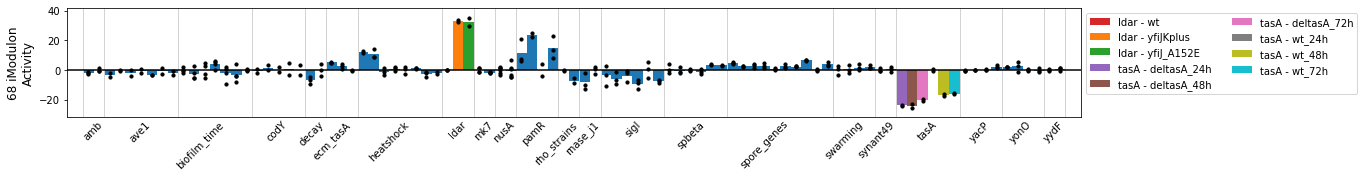

In [42]:
plot_activities(ica_data,68,highlight=['ldar','tasA'])

In [43]:
DF_enrichments[DF_enrichments.imodulon=='68'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value
368,68,NaN,0.000035,0.010114,0.074074,0.25,0.114286,4.0,16.0,54.0,NaN,NaN,NaN,NaN,control of response regulators/ other
369,68,NaN,0.000208,0.029685,0.055556,0.30,0.093750,3.0,10.0,54.0,NaN,NaN,NaN,NaN,short peptides


In [44]:
# Update the ica_data object
ica_data.rename_imodulons({68:'uncharacterized-5'})

## iModulon 69: cssRS

In [45]:
ica_data.view_imodulon(69)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_07770,0.089101,yfkS,AL009126.3,BSU07770,847282,847482,-,putative spore germination D protein,No COG annotation,O35036,Op616,"SigB,SigG"
BSU_07780,0.113342,yfkR,AL009126.3,BSU07780,847498,848652,-,putative spore germination protein,Function unknown,O35028,Op616,"SigB,SigG"
BSU_18978,0.089788,bsrE,AL009126.3,BSU18978,2069883,2069975,+,type I toxin (BsrE/AsrE),No COG annotation,A0A2K4Z9J5,Op1467,NaN
BSU_33010,0.184001,cssR,AL009126.3,BSU33010,3385724,3386401,+,folding stress-sensitive two-component respons...,Signal transduction mechanisms,O32192,Op2595,"SigA,CssR"
BSU_33020,0.230461,cssS,AL009126.3,BSU33020,3386398,3387753,+,folding stress-sensitive two-component sensor ...,Signal transduction mechanisms,O32193,Op2595,"SigA,CssR"
BSU_35810,0.098531,gerBB,AL009126.3,BSU35810,3690269,3691375,+,component of germinant receptor B,Amino acid transport and metabolism,P39570,Op2788,SigG
BSU_35820,0.099053,gerBC,AL009126.3,BSU35820,3691372,3692496,+,lipoprotein component of the germination recep...,Function unknown,P39571,Op2788,SigG


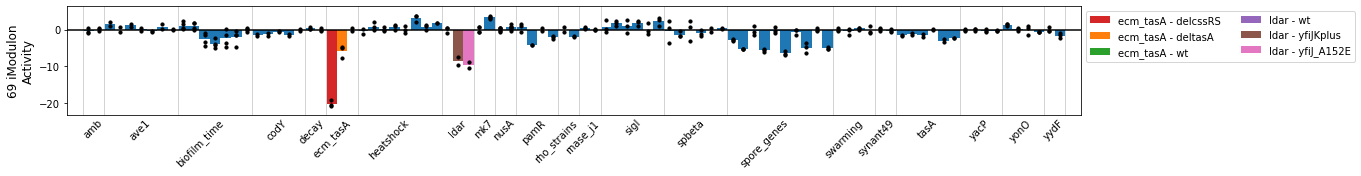

In [46]:
plot_activities(ica_data,69,highlight=['ecm_tasA','ldar'])

In [47]:
DF_enrichments[DF_enrichments.imodulon=='69'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value
93,69,NaN,0.000002,0.000604,0.285714,1.0,0.444444,2.0,2.0,7.0,NaN,M00448,NaN,NaN,NaN


In [48]:
# Update the ICA data object

ica_data.rename_imodulons({69:'putative-cssRS'})
ica_data.imodulon_table.loc['putative-cssRS','category'] = 'functional'

### iModulon 70: Unknown

In [49]:
ica_data.view_imodulon(70)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_01000,-0.062140,secE,AL009126.3,BSU01000,117532,117711,+,preprotein translocase subunit,"Intracellular trafficking, secretion, and vesi...",Q06799,Op62,"SigA,AbrB"
BSU_02080,-0.053151,ybxH,AL009126.3,BSU02080,228331,228522,+,conserved protein of unknown function,Function unknown,P54426,Op154,"SpoVT,SigG"
BSU_02585,0.065121,BSU_02585,AL009126.3,BSU02585,281675,281809,-,hypothetical protein,No COG annotation,A0A2K4Z9H7,Op192,NaN
BSU_03788,-0.058862,yczM,AL009126.3,BSU03788,430185,430274,-,putative type I toxin,No COG annotation,C0H3V0,Op285,NaN
BSU_03789,0.063835,yczN,AL009126.3,BSU03789,430356,430469,-,putative spore and germination protein,No COG annotation,C0H3V1,Op286,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
BSU_39139,0.081856,yxzJ,AL009126.3,BSU39139,4019005,4019136,-,conserved protein of unknown function,No COG annotation,C0H3T5,Op3025,NaN
BSU_40120,-0.061538,ptsJ,AL009126.3,BSU40120,4122619,4122849,-,glucose phosphotransferase system enzyme IIA c...,Carbohydrate transport and metabolism,O32292,Op3077,NaN
BSU_40160,0.059322,liaK,AL009126.3,BSU40160,4125742,4126500,-,membrane metalloprotease acting on modified fa...,"Post-translational modification, protein turno...",Q45594,Op3080,"Rok,SigA,AbrB"
BSU_40310,-0.066793,phrG,AL009126.3,BSU40310,4141358,4141474,+,secreted regulator of the activity of phosphat...,No COG annotation,O32295,Op3092,"SigA,SinR,RghR,SigH,CcpA"


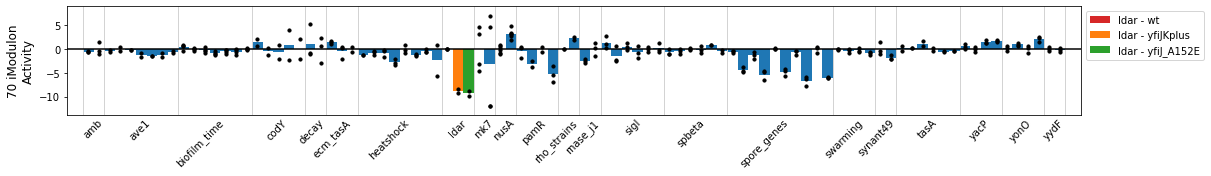

In [50]:
plot_activities(ica_data,70,highlight=['ldar'])

In [51]:
# Update the ica_data object
ica_data.rename_imodulons({70:'uncharacterized-6'})

### iModulon 71: Putative yxi-operon

In [52]:
ica_data.view_imodulon(71)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_39120,0.107038,yxiM,AL009126.3,BSU39120,4017508,4018656,-,esterase (lipoprotein),Amino acid transport and metabolism,P42304,Op3023,NaN
BSU_39129,0.111279,yxzI,AL009126.3,NaN,4018786,4018974,-,hypothetical protein,No COG annotation,NaN,Op3024,NaN
BSU_39139,0.113504,yxzJ,AL009126.3,BSU39139,4019005,4019136,-,conserved protein of unknown function,No COG annotation,C0H3T5,Op3025,NaN
BSU_39140,0.116876,yxiK,AL009126.3,BSU39140,4019148,4019609,-,conserved protein of unknown function,No COG annotation,P42302,Op3026,NaN
BSU_39150,0.115552,yxiJ,AL009126.3,BSU39150,4019625,4019921,-,conserved protein of unknown function,Function unknown,P42320,Op3027,NaN
BSU_39160,0.127599,yxiI,AL009126.3,BSU39160,4019949,4020437,-,conserved protein of unknown function,Function unknown,P42301,Op3028,NaN
BSU_39170,0.133228,yxzG,AL009126.3,BSU39170,4020455,4020907,-,putative nucleic acid binding protein,No COG annotation,O32285,Op3029,NaN
BSU_39180,0.130903,yxiH,AL009126.3,BSU39180,4020977,4021306,-,conserved protein of unknown function,No COG annotation,P42300,Op3030,NaN
BSU_39190,0.141250,yxiG,AL009126.3,BSU39190,4021429,4021845,-,conserved hypothetical protein,No COG annotation,P42299,Op3031,NaN
BSU_39200,0.130152,yxzC,AL009126.3,BSU39200,4021896,4022264,-,putative nucleic acid binding protein,No COG annotation,O32286,Op3032,NaN


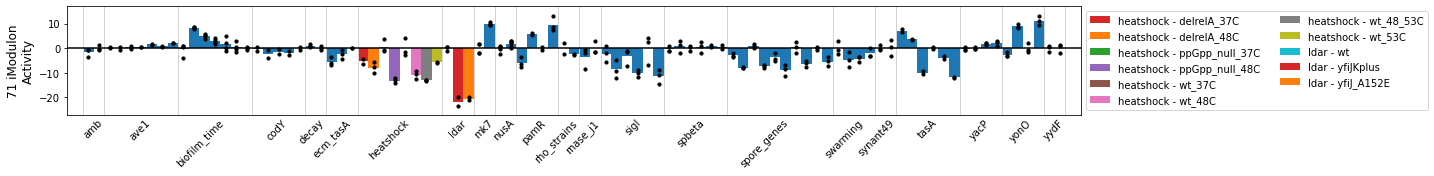

In [53]:
plot_activities(ica_data,71,highlight=['ldar','heatshock'])

In [54]:
# Update ICA data object
ica_data.rename_imodulons({71:'yxi-operon'})
ica_data.imodulon_table.loc['yxi-operon','category'] = 'functional'

# Double-check low-scoring iModulons

In [55]:
ica_data.imodulon_table[ica_data.imodulon_table['f1score']  < 0.25]

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,single_gene,explained_variance,category
CsoR/Fnr,CsoR/Fnr,1.842216e-11,8.799896e-07,0.113636,0.400000,0.176991,10.0,25.0,88,2.0,NaN,0.018237,regulatory
RhgR,RhgR,4.739042e-13,1.611274e-11,0.062500,1.000000,0.117647,8.0,8.0,128,1.0,NaN,0.019527,regulatory
NusA,NusA,1.788207e-11,7.510469e-10,0.054264,1.000000,0.102941,7.0,7.0,129,1.0,NaN,0.011770,regulatory
CsoR,CsoR,1.163609e-10,8.145265e-10,0.127273,0.500000,0.202899,7.0,14.0,55,1.0,NaN,0.015380,regulatory
DegU,DegU,2.854706e-11,1.427353e-10,0.370370,0.119048,0.180180,10.0,84.0,27,1.0,NaN,0.005933,regulatory
Rok,Rok,6.692924e-17,1.673231e-15,0.156250,0.441176,0.230769,15.0,34.0,96,1.0,NaN,0.008361,regulatory
YonO-2,YonO,4.492705e-08,8.985409e-08,0.416667,0.121951,0.188679,5.0,41.0,12,1.0,NaN,0.000940,regulatory
AbrB,AbrB,6.614330e-22,8.598629e-21,0.869565,0.073801,0.136054,20.0,271.0,23,1.0,NaN,0.024879,regulatory
CcpA-2,CcpA,4.279881e-27,6.419821e-26,0.812500,0.099237,0.176871,26.0,262.0,32,1.0,NaN,0.008381,regulatory


In [56]:
def clear_row(imodulon):
    clear_columns = ['regulator','pvalue','qvalue','precision','recall','f1score','TP','regulon_size','n_regs']
    
    for col in clear_columns:
        ica_data.imodulon_table.loc[imodulon,col] = None

### CsoR/Fnr -> SPbeta-1

In [57]:
ica_data.imodulon_table.loc['CsoR/Fnr']

regulator                CsoR/Fnr
pvalue                1.84222e-11
qvalue                 8.7999e-07
precision                0.113636
recall                        0.4
f1score                  0.176991
TP                             10
regulon_size                   25
imodulon_size                  88
n_regs                          2
single_gene                   NaN
explained_variance      0.0182374
category               regulatory
Name: CsoR/Fnr, dtype: object

In [58]:
DF_enrichments[DF_enrichments.imodulon=='CsoR/Fnr'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value
30,CsoR/Fnr,NaN,6.770882e-80,1.936472e-77,0.772727,0.361702,0.492754,68.0,188.0,88.0,NaN,NaN,NaN,NaN,SP-beta prophage
31,CsoR/Fnr,NaN,7.175086e-65,1.026037e-62,0.772727,0.233677,0.358839,68.0,291.0,88.0,NaN,NaN,NaN,NaN,prophages
32,CsoR/Fnr,NaN,1.953503e-63,1.862339e-61,0.772727,0.223684,0.346939,68.0,304.0,88.0,NaN,NaN,NaN,NaN,Prophages and mobile genetic elements
33,CsoR/Fnr,NaN,3.678034e-07,2.629795e-05,0.056818,0.555556,0.103093,5.0,9.0,88.0,NaN,NaN,NaN,NaN,anaerobic respiration
35,CsoR/Fnr,NaN,8.372872e-05,3.991069e-03,0.068182,0.162162,0.096000,6.0,37.0,88.0,NaN,NaN,NaN,NaN,respiration
34,CsoR/Fnr,NaN,1.866140e-05,1.067432e-03,0.045455,0.444444,0.082474,4.0,9.0,88.0,NaN,NaN,NaN,NaN,overflow metabolism
10,CsoR/Fnr,NaN,3.111113e-04,7.000005e-02,0.045455,0.235294,0.076190,4.0,17.0,88.0,NaN,map00910,Nitrogen metabolism,NaN,NaN
10,CsoR/Fnr,NaN,8.144105e-06,2.190764e-03,0.034091,1.000000,0.065934,3.0,3.0,88.0,NaN,M00529,NaN,"Denitrification, nitrate => nitrogen",NaN
11,CsoR/Fnr,NaN,1.557860e-04,2.095322e-02,0.034091,0.500000,0.063830,3.0,6.0,88.0,NaN,M00530,NaN,"Dissimilatory nitrate reduction, nitrate => am...",NaN
12,CsoR/Fnr,NaN,4.093833e-04,3.670804e-02,0.022727,1.000000,0.044444,2.0,2.0,88.0,NaN,M00804,NaN,"Complete nitrification, comammox, ammonia => n...",NaN


In [59]:
# Update the ICA data object

ica_data.rename_imodulons({'CsoR/Fnr':'SPbeta-1'})
ica_data.imodulon_table.loc['SPbeta-1','category'] = 'functional'
clear_row('SPbeta-1')

### RhgR -> Carbon metabolism/skin element

In [60]:
ica_data.imodulon_table.loc['RhgR']

regulator                    RhgR
pvalue                4.73904e-13
qvalue                1.61127e-11
precision                  0.0625
recall                          1
f1score                  0.117647
TP                              8
regulon_size                    8
imodulon_size                 128
n_regs                          1
single_gene                   NaN
explained_variance      0.0195274
category               regulatory
Name: RhgR, dtype: object

In [61]:
DF_enrichments[DF_enrichments.imodulon=='RhgR'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value
83,RhgR,NaN,4.916032e-15,7.029925e-13,0.257812,0.143478,0.184358,33.0,239.0,128.0,NaN,NaN,NaN,NaN,utilization of specific carbon sources
82,RhgR,NaN,3.414975e-18,9.766827e-16,0.093750,0.923077,0.170213,12.0,13.0,128.0,NaN,NaN,NaN,NaN,utilization of pectin
84,RhgR,NaN,2.442151e-12,2.328184e-10,0.257812,0.116197,0.160194,33.0,299.0,128.0,NaN,NaN,NaN,NaN,carbon metabolism
85,RhgR,NaN,1.883701e-10,1.346846e-08,0.117188,0.238095,0.157068,15.0,63.0,128.0,NaN,NaN,NaN,NaN,Skin element
90,RhgR,NaN,2.879252e-04,9.149623e-03,0.156250,0.068729,0.095465,20.0,291.0,128.0,NaN,NaN,NaN,NaN,prophages
91,RhgR,NaN,5.123535e-04,1.465331e-02,0.156250,0.065789,0.092593,20.0,304.0,128.0,NaN,NaN,NaN,NaN,Prophages and mobile genetic elements
92,RhgR,NaN,1.857884e-03,4.830500e-02,0.187500,0.054920,0.084956,24.0,437.0,128.0,NaN,NaN,NaN,NaN,transporters
93,RhgR,NaN,3.471510e-03,8.273765e-02,0.109375,0.066351,0.082596,14.0,211.0,128.0,NaN,NaN,NaN,NaN,ABC transporters
24,RhgR,NaN,2.234027e-05,3.004766e-03,0.039062,0.384615,0.070922,5.0,13.0,128.0,NaN,M00429,NaN,NaN,NaN
88,RhgR,NaN,7.057531e-05,2.883505e-03,0.039062,0.312500,0.069444,5.0,16.0,128.0,NaN,NaN,NaN,NaN,utilization of hexuronate


In [62]:
# Update the ICA data object

ica_data.rename_imodulons({'RhgR':'carbon metabolism/skin element'})
ica_data.imodulon_table.loc['carbon metabolism/skin element','category'] = 'functional'
clear_row('carbon metabolism/skin element')

## NusA -> ComK/LevR/NusA

In [63]:
ica_data.imodulon_table.loc['NusA']

regulator                    NusA
pvalue                1.78821e-11
qvalue                7.51047e-10
precision               0.0542636
recall                          1
f1score                  0.102941
TP                              7
regulon_size                    7
imodulon_size                 129
n_regs                          1
single_gene                   NaN
explained_variance      0.0117704
category               regulatory
Name: NusA, dtype: object

In [64]:
DF_enrichments[DF_enrichments.imodulon=='NusA'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value
206,NusA,NaN,7.520894e-07,1.075488e-04,0.147287,0.107955,0.124590,19.0,187.0,129.0,NaN,NaN,NaN,NaN,genetics
57,NusA,NaN,5.731914e-10,1.541885e-07,0.062016,0.615385,0.112676,8.0,13.0,129.0,NaN,M00429,NaN,NaN,NaN
207,NusA,NaN,2.144949e-06,2.044851e-04,0.077519,0.192308,0.110497,10.0,104.0,129.0,NaN,NaN,NaN,NaN,genetic competence
76,NusA,NaN,2.640817e-08,5.941839e-06,0.054264,0.538462,0.098592,7.0,13.0,129.0,NaN,map00290,"Valine, leucine and isoleucine biosynthesis",NaN,NaN
205,NusA,NaN,2.708177e-07,7.745386e-05,0.054264,0.411765,0.095890,7.0,17.0,129.0,NaN,NaN,NaN,NaN,biosynthesis/ acquisition of branched-chain am...
209,NusA,NaN,5.143547e-04,2.788112e-02,0.209302,0.057447,0.090150,27.0,470.0,129.0,NaN,NaN,NaN,NaN,sporulation proteins
78,NusA,NaN,1.253048e-05,9.397862e-04,0.054264,0.250000,0.089172,7.0,28.0,129.0,NaN,map01210,2-Oxocarboxylic acid metabolism,NaN,NaN
212,NusA,NaN,2.183264e-03,7.805167e-02,0.317829,0.045354,0.079380,41.0,1131.0,129.0,NaN,NaN,NaN,NaN,Information processing
213,NusA,NaN,2.457999e-03,7.810976e-02,0.054264,0.111111,0.072917,7.0,63.0,129.0,NaN,NaN,NaN,NaN,Skin element
210,NusA,NaN,5.849187e-04,2.788112e-02,0.046512,0.166667,0.072727,6.0,36.0,129.0,NaN,NaN,NaN,NaN,tRNA modification and maturation


In [65]:
ica_data.compute_trn_enrichment('NusA', max_regs=3,force=True,save=True)

,imodulon,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs
0,NusA,ComK/LevR/NusA,2.191960e-21,7.674319e-15,0.193798,0.352113,0.250000,25.0,71.0,129.0,3.0
1,NusA,LevR/OhrR/NusA,8.056984e-21,1.410424e-14,0.100775,1.000000,0.183099,13.0,13.0,129.0,3.0
2,NusA,LevR/YfmP/NusA,1.099801e-19,6.417561e-14,0.100775,0.928571,0.181818,13.0,14.0,129.0,3.0
3,NusA,ComK/SigL/NusA,7.419812e-20,6.417561e-14,0.201550,0.292135,0.238532,26.0,89.0,129.0,3.0
4,NusA,ComK/NusA/T-box,6.486468e-20,6.417561e-14,0.217054,0.261682,0.237288,28.0,107.0,129.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
460,NusA,ComK/SigG/MalR,1.287429e-09,9.758854e-06,0.193798,0.119048,0.147493,25.0,210.0,129.0,3.0
461,NusA,ComK/SigG/SacY,1.287429e-09,9.758854e-06,0.193798,0.119048,0.147493,25.0,210.0,129.0,3.0
462,NusA,SigL/MhqR/T-box,1.290543e-09,9.758854e-06,0.116279,0.211268,0.150000,15.0,71.0,129.0,3.0
463,NusA,NusA/MhqR,1.304144e-09,9.819285e-06,0.062016,0.571429,0.111888,8.0,14.0,129.0,2.0


In [66]:
# Update the ICA data object

ica_data.rename_imodulons({'NusA':'ComK/LevR/NusA'})

## CsoR -> SPbeta-2

In [67]:
ica_data.imodulon_table.loc['CsoR']

regulator                    CsoR
pvalue                1.16361e-10
qvalue                8.14527e-10
precision                0.127273
recall                        0.5
f1score                  0.202899
TP                              7
regulon_size                   14
imodulon_size                  55
n_regs                          1
single_gene                   NaN
explained_variance      0.0153802
category               regulatory
Name: CsoR, dtype: object

In [68]:
DF_enrichments[DF_enrichments.imodulon=='CsoR'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value
214,CsoR,NaN,4.560304e-76,1.304247e-73,0.981818,0.287234,0.444444,54.0,188.0,55.0,NaN,NaN,NaN,NaN,SP-beta prophage
215,CsoR,NaN,1.937387e-64,2.770463e-62,0.981818,0.185567,0.312139,54.0,291.0,55.0,NaN,NaN,NaN,NaN,prophages
216,CsoR,NaN,2.598987e-63,2.477701e-61,0.981818,0.177632,0.300836,54.0,304.0,55.0,NaN,NaN,NaN,NaN,Prophages and mobile genetic elements
64,CsoR,NaN,2.192982e-04,5.899121e-02,0.054545,0.300000,0.092308,3.0,10.0,55.0,NaN,M00053,NaN,"Pyrimidine deoxyribonuleotide biosynthesis, CD...",NaN
217,CsoR,NaN,9.373689e-04,6.702187e-02,0.036364,0.500000,0.067797,2.0,4.0,55.0,NaN,NaN,NaN,NaN,DNA replication/ based on similarity


In [69]:
# Update the ICA data object

ica_data.rename_imodulons({'CsoR':'SPbeta-2'})
ica_data.imodulon_table.loc['SPbeta-2','category'] = 'functional'
clear_row('SPbeta-2')

## Xpf

In [70]:
ica_data.compute_trn_enrichment('Xpf',max_regs=2,save=True)

,imodulon,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs
0,Xpf,Xre/Xpf,5.255146e-69,2.509332e-64,0.611111,1.000000,0.758621,33.0,33.0,54.0,2.0
1,Xpf,Xpf,1.548917e-55,3.698039e-51,0.500000,1.000000,0.666667,27.0,27.0,54.0,1.0
2,Xpf,Xpf/YclJ,2.809484e-50,4.471762e-46,0.518519,0.777778,0.622222,28.0,36.0,54.0,2.0
3,Xpf,Xpf/FadR,4.263676e-49,5.089764e-45,0.537037,0.674419,0.597938,29.0,43.0,54.0,2.0
4,Xpf,Xpf/LexA,1.367897e-41,1.306342e-37,0.574074,0.369048,0.449275,31.0,84.0,54.0,2.0
5,Xpf,SigM/Xpf,9.957493e-31,7.924505e-27,0.518519,0.233333,0.321839,28.0,120.0,54.0,2.0
6,Xpf,Xpf/AbrB,1.074619e-21,7.330439e-18,0.555556,0.100671,0.170455,30.0,298.0,54.0,2.0
7,Xpf,Xre,2.851014e-12,1.701699e-08,0.111111,1.000000,0.200000,6.0,6.0,54.0,1.0
8,Xpf,Xre/FadR,9.651932e-11,5.120886e-07,0.148148,0.363636,0.210526,8.0,22.0,54.0,2.0
9,Xpf,Xre/YclJ,1.888649e-10,9.018299e-07,0.129630,0.466667,0.202899,7.0,15.0,54.0,2.0


In [71]:
ica_data.rename_imodulons({'Xpf':'Xre/Xpf'})

## Adjust some thresholds

In [72]:
ica_data.change_threshold('Thi-box',.1)
ica_data.change_threshold('LnrK',.15)
ica_data.change_threshold('KipR',0.12)

# Recalculate enrichments
ica_data.compute_trn_enrichment(['Thi-box','LnrK','KipR'], save=True)

,imodulon,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs
0,Thi-box,Thi-box,1.033185e-33,1.033185e-33,1.0,0.857143,0.923077,12.0,14.0,12.0,1.0
1,LnrK,LnrK,0.000000e+00,0.000000e+00,1.0,1.000000,1.000000,3.0,3.0,3.0,1.0
2,KipR,KipR,0.000000e+00,0.000000e+00,1.0,1.000000,1.000000,7.0,7.0,7.0,1.0
3,KipR,TnrA,8.103543e-13,1.620709e-12,1.0,0.083333,0.153846,7.0,84.0,7.0,1.0


# Add biological functions
This is only relevant for 'biological' and 'regulatory iModulons

In [73]:
subti_annot = pd.read_csv(path.join('..','data','external','subtiwiki_categories.csv'))
subti_annot.rename({'BSU_number':'gene_id'},axis=1,inplace=True)
subti_annot = subti_annot[subti_annot.gene_id.isin(ica_data.gene_names)]

In [74]:
subti_enrich = ica_data.compute_annotation_enrichment(subti_annot,'FuncName2')
functions = subti_enrich.sort_values('qvalue').drop_duplicates('imodulon').set_index('imodulon')['FuncName2']
functions = functions[ica_data.imodulon_table.category.isin(['regulatory','functional'])]
functions.head()

imodulon
SPbeta-1      prophages
SPbeta-2      prophages
SigK        sporulation
SigE        sporulation
Fur         homeostasis
Name: FuncName2, dtype: object

In [75]:
ica_data.imodulon_table['function'] = functions

## Manually curate functions

In [76]:
ica_data.imodulon_table.function.value_counts()

carbon metabolism                                    8
amino acid/ nitrogen metabolism                      6
coping with stress                                   6
prophages                                            5
nucleotide metabolism                                3
sporulation                                          3
exponential and early post-exponential lifestyles    3
homeostasis                                          3
electron transport and ATP synthesis                 3
transporters                                         2
additional metabolic pathways                        2
proteins of unknown function                         2
lipid metabolism                                     1
ncRNA                                                1
short peptides                                       1
essential genes                                      1
mobile genetic elements/ based on similarity         1
cell envelope and cell division                      1
mobile gen

In [77]:
rename = {'carbon metabolism':'Carbon Metabolism',
          'coping with stress':'Stress Response',
          'amino acid/ nitrogen metabolism':'AA/Nucleotide Metabolism',
          'prophages':'Prophages',
          'sporulation':'Lifestyles',
          'exponential and early post-exponential lifestyles':'Lifestyles',
          'electron transport and ATP synthesis': 'Misc. Metabolism',
          'homeostasis':'Homeostasis',
          'nucleotide metabolism':'AA/Nucleotide Metabolism',
          'proteins of unknown function':'Other',
          'additional metabolic pathways':'Misc. Metabolism',
          'short peptides':'Cellular Processes',
          'essential genes':'Cellular Processes',
          'transporters':'Misc. Metabolism',
          'mobile genetic elements': 'Cellular Processes',
          'ncRNA':'Cellular Processes',
          'mobile genetic elements/ based on similarity':'Cellular Processes',
          'lipid metabolism':'Misc. Metabolism',
          'cell envelope and cell division': 'Cellular Processes',
          'genetics':'Cellular Processes'}

In [78]:
ica_data.imodulon_table.function = ica_data.imodulon_table.function.replace(rename)

In [79]:
ica_data.imodulon_table.loc['ybc-operon','function'] = 'Prophages'
ica_data.imodulon_table.loc['SigI','function'] = 'Stress Response'
ica_data.imodulon_table.loc['LnrK','function'] = 'Cellular Processes'
ica_data.imodulon_table.loc['early-biofilm','function'] = 'Lifestyles'
ica_data.imodulon_table.loc['KipR','function'] = 'Misc. Metabolism'
ica_data.imodulon_table.loc['AbrB','function'] = 'Lifestyles'
ica_data.imodulon_table.loc['putative-cssRS','function'] = 'Lifestyles'
ica_data.imodulon_table.loc['YvaF','function'] = 'Other'

In [80]:
ica_data.imodulon_table.function.value_counts()

AA/Nucleotide Metabolism    9
Lifestyles                  9
Carbon Metabolism           8
Cellular Processes          8
Misc. Metabolism            8
Stress Response             7
Prophages                   6
Homeostasis                 3
Other                       3
Name: function, dtype: int64

## Fill in Uncharacterized and Single Gene iModulons

In [81]:
ica_data.imodulon_table.function = ['Uncharacterized' if row.category == 'uncharacterized' else
                                    'Single Gene' if row.category == 'single_gene' else row.function
                                    for i,row in ica_data.imodulon_table.iterrows()]


# Save final ICA data object

In [82]:
save_to_json(ica_data, path.join(data_dir, 'bsu.json.gz'))

In [83]:
ica_data.imodulon_table.to_csv(path.join(data_dir, 'imodulon_table.csv'))